# 机器学习
## 第一章 绪论（主要提出基本概念）
### 1.1 引言
机器学习是一门致力于从`数据`中提取知识，并运用这些知识对未知数据进行`预测`和`决策`的科学。机器学习的主要任务是从数据中学习`模型`，并利用模型对新数据进行预测和决策。（类似于高数中微分中值定理，利用部分点的信息来推断整体的趋势）
### 1.2 基本术语
- `数据集`：由输入和输出组成的集合，用于训练模型。如：收集的各种西瓜数据    
- `属性`:数据集中的一个特征，如：每朵西瓜的颜色、形状、重量、含糖率等    
- `样本`：数据集中的一个实例，即一条数据记录。如：一条西瓜数据记录     
- `样本空间`:由所有可能的样本组成的集合,每一个样本都在样本空间中有一个确定的位置     
- `分类`:预测结果为离散。如：好瓜or坏瓜     
- `回归`:预测结果为连续。如：西瓜的成熟度     
- `聚类`:将样本集划分为若干个子集，使得同一子集中的样本相似度较高，不同子集中的样本相似度较低（分类结果的概念我们事先不知道，且训练样本集中没有标签信息）。如：将西瓜数据集划分为好瓜子集和坏瓜子集    
- `监督学习与无监督学习`:训练样本是否拥有标注信息。如：有标签的西瓜数据集为监督学习，无标签的西瓜数据集为无监督学习。     
- `泛化能力`:模型在新数据上的预测能力。     
### 1.3 假设空间与归纳偏好
- `归纳`:从特殊到一般的过程，即从具体的事实归结出一般性的规律。如：从具体的西瓜到抽象的瓜。       
- `演绎`:从一般到特殊的过程，即从基本原理推演出具体的状况。如：从瓜的基本原理推演出具体的西瓜。     
我们把学习的过程看作一个所有假设组成的空间中进行探索的过程，探索目标是找到能够使得假设空间中所有假设都正确的模型。假设表达一旦确定，假设空间及其规模大小就确定了。    
- `由假设空间到版本空间（难）`：在假设空间中，不断删除与正例不一致的假设、和与反例一致的假设。最终将获得与训练集一致（即对所有训练集样本都有正确预测）的假设集合。  
由于版本空间中的假设不止一个，所以我们需要对版本空间中的假设进行选择，选择出最优的假设。这就涉及到`归纳偏好`。     
- `奥卡姆剃刀`:如果有多个假设都与训练集一致，那么选择最简单的那个。     
- `没有免费的午餐（NFL）`:无论算法a有多聪明、算法b有多笨拙，他们的期望性能相同。即脱离具体问题，空谈什么算法好、什么算法坏，都是没有意义的。     

## 第二章 模型评估与选择
### 2.1 经验误差与过拟合
- `错误率`：分类错误的样本数占总样本数的比例。
- `训练误差`：模型在训练数据上的误差。
- `泛化误差`：模型在新数据上的误差。
- `过拟合`：学得太好，把自身某些样本的特性当作一般性质,从而导致泛化性能下降。    
- `欠拟合`：模型过于简单，不能很好地拟合训练数据。   
### 2.2 评估方法及调参
在现实任务中，我们往往有多种算法可供选择，那么我们应该选择哪一个算法才是最适合的呢？如上所述，我们希望得到的是泛化误差小的学习器，理想的解决方案是对模型的泛化误差进行评估，然后选择泛化误差最小的那个学习器。但是，泛化误差指的是模型在所有新样本上的适用能力，我们无法直接获得泛化误差。    
因此，通常我们采用一个“测试集”来测试学习器对新样本的判别能力，然后以“测试集”上的“测试误差”作为“泛化误差”的近似。显然：我们选取的测试集应尽可能与训练集互斥，下面用一个小故事来解释why：    
假设老师出了10 道习题供同学们练习，考试时老师又用同样的这10道题作为试题，可能有的童鞋只会做这10 道题却能得高分，很明显：这个考试成绩并不能有效地反映出真实水平。回到我们的问题上来，我们希望得到泛化性能好的模型，好比希望同学们课程学得好并获得了对所学知识"举一反三"的能力；训练样本相当于给同学们练习的习题，测试过程则相当于考试。显然，若测试样本被用作训练了，则得到的将是过于"乐观"的估计结果。    
- `留出法`：将数据集D划分为两个**互斥**的集合，一个作为训练集S，一个作为测试集T，满足**D=S∪T且S∩T=∅**，常见的划分为：大约**2/3-4/5**的样本用作训练，剩下的用作测试。需要注意的是：训练/测试集的划分要尽可能保持**数据分布的一致性**，以避免由于分布的差异引入额外的偏差，常见的做法是采取**分层抽样**。同时，由于划分的随机性，单次的留出法结果往往不够稳定，一般要采用若干次随机划分，重复实验取**平均**值的做法。    

In [ ]:
#导入库
import numpy as np
from sklearn.model_selection import train_test_split
# 生成数据集（1000样本，3个特征）
X = np.arange(3000).reshape((1000, 3))
# 生成二分类标签（0和1），这里假设正负样本比例为5:5
# 这里使用了numpy的random.choice函数，随机生成正负样本比例
y = np.random.choice([0, 1], size=1000, p=[0.5, 0.5])
# 划分数据集（保持类别比例，添加分层抽样）
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  
)
# 打印验证
print("原始数据类别分布:", np.bincount(y))
print("训练集类别分布:", np.bincount(y_train))
print("测试集类别分布:", np.bincount(y_test))
print("X_test 示例:", X_test[:2])

- `交叉检验法`:将数据集D划分为k个大小相同的互斥子集，满足D=D1∪D2∪...∪Dk，Di∩Dj=∅（i≠j），同样地尽可能保持数据分布的一致性，即采用分层抽样的方法获得这些子集。交叉验证法的思想是：**每次用k-1个子集的并集作为训练集，余下的那个子集作为测试集**，这样就有K种训练集/测试集划分的情况，从而可进行k次训练和测试，最终返回k次测试结果的**均值**。交叉验证法也称“k折交叉验证”，k最常用的取值是10，下图给出了10折交叉验证的示意图。     
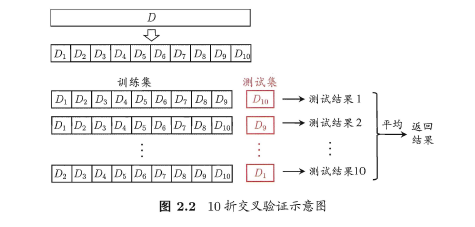              
特别地，当k=n时，即为**留一法**，这种方法称为“留一交叉验证”。留一法的评估结果比较准确，但对计算机的消耗也是巨大的。

In [ ]:
#导入库
import numpy as np
from sklearn.model_selection import StratifiedKFold
# 生成数据集（1000样本，3个特征）
X = np.arange(3000).reshape((1000, 3))
# 生成二分类标签（0和1），这里假设正负样本比例为5:5
# 这里使用了numpy的random.choice函数，随机生成正负样本比例
y = np.random.choice([0, 1], size=1000, p=[0.5, 0.5])
# 配置分层交叉验证（自动保持类别比例）
skf = StratifiedKFold(
    n_splits=5,          # k = 5        
    shuffle=True,        # 打乱数据顺序
    random_state=42      # 固定随机种子
)
# 执行交叉验证
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
     # 提取训练集和验证集
    X_train, X_val = X[train_idx], X[test_idx]
    y_train, y_val = y[train_idx], y[test_idx]
    
    print(f"\n========== 折 {fold+1} ==========")
    print("训练集样本数:", len(train_idx))
    print("验证集样本数:", len(test_idx))
    print("验证集类别分布:", np.bincount(y_val))
    print("验证集特征示例:\n", X_val[:2])  # 查看前2个样本

- `自助法（抽样）`：我们希望评估的是用整个D训练出的模型。但在留出法和交叉验证法中，由于保留了一部分样本用于测试，因此实际评估的模型所使用的训练集比D小，这必然会引入一些因训练样本规模不同而导致的估计偏差。留一法受训练样本规模变化的影响较小，但计算复杂度又太高了。前两个方法的本质是**划分**，而自助法是**抽样**的思想。     
**自助法的基本思想是**：给定包含m个样本的数据集D，每次随机从D 中挑选一个样本，将其拷贝放入D'，然后再将该样本放回初始数据集D 中，使得该样本在下次采样时仍有可能被采到。重复执行m 次，就可以得到了包含m个样本的数据集D'。可以得知在m次采样中，样本始终不被采到的概率取极限为：  
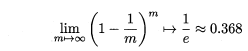     
通过自助采样，初始样本集D中大约有36.8%的样本没有出现在D'中，于是可以将D'作为训练集，D-D'作为测试集。自助法在**数据集较小，难以有效划分训练集/测试集时很有用**，但由于自助法产生的数据集（随机抽样）改变了初始数据集的分布，因此引入了估计偏差。在初始数据集足够时，留出法和交叉验证法更加常用。

In [ ]:
import numpy as np

# 生成训练集和测试集（适用于小数据集）
def bootstrap_split(X, y):
    #从0到len(X)中随机抽取len(X)个索引，允许重复，返回一个索引数组
    indices = np.random.choice(len(X), size=len(X), replace=True)
    train_X, train_y = X[indices], y[indices]
    # 测试集为未抽中的样本
    test_indices = np.setdiff1d(np.arange(len(X)), indices)
    test_X, test_y = X[test_indices], y[test_indices]
    return train_X, test_X, train_y, test_y

# 示例数据集
X = np.arange(300).reshape(100, 3)
y = np.random.choice([0, 1], size=100)

# 执行一次自助法划分
train_X, test_X, train_y, test_y = bootstrap_split(X, y)
print(f"训练集大小: {len(train_X)}, 测试集大小: {len(test_X)}")

- `调参`:大多数学习算法都有些参数(parameter) 需要设定，参数配置不同，学得模型的性能往往有显著差别，这就是通常所说的"参数调节"或简称"调参" (parameter tuning)。    
学习算法的很多参数是在实数范围内取值，因此，对每种参数取值都训练出模型来是不可行的。常用的做法是：对每个参数选定一个范围和步长λ，这样使得学习的过程变得可行。例如：假定算法有3 个参数，每个参数仅考虑5 个候选值，这样对每一组训练/测试集就有5×5×5= 125 个模型需考察，由此可见：拿下一个参数（即经验值）对于算法人员来说是有多么的不容易。    
需要注意的是：当选定好模型和调参完成后，我们需要使用初始的数据集D重新训练模型，即让最初划分出来用于评估的测试集也被模型学习，增强模型的学习效果。   
此外，需要区分验证集和测试集，**验证集**用于模型的超参数选择，在训练中会反复使用，而**测试集**用于模型的最终评估，仅训练后使用一次。至此，我们将数据集划分为训练集和测试集，其中再将训练集划分为训练集和验证集。

### 2.3 性能度量
性能度量（performance measure）是衡量模型泛化能力的评价标准，在对比不同模型的能力时，使用不同的性能度量往往会导致不同的评判结果。
- `均方误差`:在回归任务中，即预测连续值的问题，最常用的性能度量是“均方误差”（mean squared error）,很多的经典算法都是采用了MSE作为评价函数。    
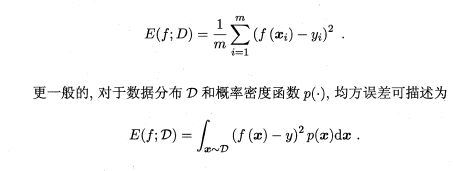    
其中D为样例集，y是示例x的真实标记，f为学习器    
- `错误率与精度`:在分类任务中，即预测离散值的问题，最常用的是错误率和精度，错误率是分类错误的样本数占样本总数的比例，精度则是分类正确的样本数占样本总数的比例，且满足：错误率+精度=1。    
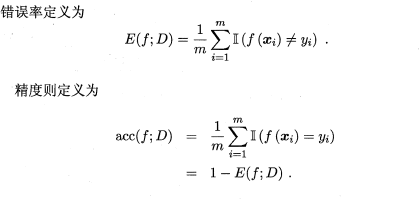     
- `查准率和查全率`:错误率和精度虽然常用，但不能满足所有的需求，例如：在西瓜问题中，假定瓜农拉来一车西瓜，我们用训练好的模型对西瓜进行判别，显然，错误率衡量了模型对瓜的分类能力，即有多少比例的瓜被判别错误了。但我们关心的是“挑出来的西瓜有多少比例是好瓜（即查准率）”和“所有好瓜中有多少比例被挑出来了（即查全率）”。因此，使用查准/查全率更适合描述这类问题。对于二分类问题，分类结果混淆矩阵与查准/查全率定义如下：    
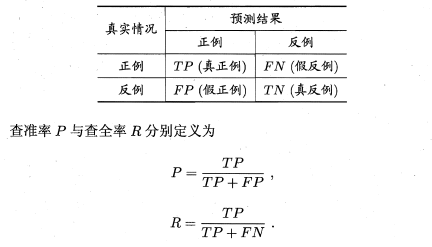     
`查准率`:在已经预测为的好瓜中，真正是好瓜的比例。    
`查全率`:在所有好瓜中，被预测为好瓜的比例。    
值得注意的是，查准率和查全率是一对**矛盾**。如要求查准率高，即选出来的瓜尽量是好瓜，则可只选最有把握的瓜，但这样无法避免漏掉一些好瓜，从而导致查全率不高。反之亦然。    
`P-R曲线`正是描述查准/查全率变化的曲线，P-R曲线定义如下：根据学习器的预测结果（一般为一个实值或概率）对测试样本进行排序，将最可能是“正例”的样本排在前面，最不可能是“正例”的排在后面，按此顺序逐个把样本作为“正例”进行预测，每次计算出当前的P值和R值，如下图所示：     
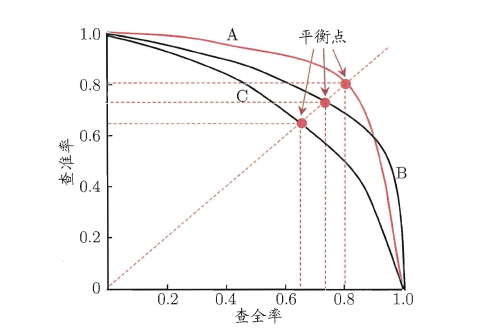      
若一个学习器A的P-R曲线被另一个学习器B的P-R曲线完全**包住(越靠近右上角，性能越好)**，则称：B的性能优于A。若A和B的曲线发生了交叉，则谁的曲线下的**面积大**，谁的性能更优。但一般来说，曲线下的面积是很难进行估算的，所以衍生出了“平衡点”（Break-Event Point，简称BEP），即当**P=R**时的取值，**平衡点的取值越高**，性能更优。    
P和R指标有时会出现矛盾的情况，这样就需要综合考虑他们，最常见的方法就是F-Measure，又称F-Score。F-Measure是P和R的加权调和平均(相比算术平均和几何平均，调和平均更加重视**较小值**)，即：    
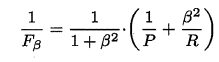    
其中β为调和因子，β=1时，F-Measure等价于F1-Score。    
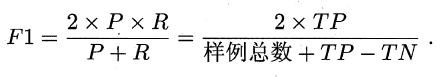    
0<β<1时查准率有更大影响，β>1时查全率有更大影响。    
有时候我们会有多个二分类混淆矩阵，例如：多次训练或者在多个数据集上训练，那么估算全局性能的方法有两种，分为宏观和微观。   
宏观就是先算出每个混淆矩阵的P值和R值，然后取得平均P值macro-P和平均R值macro-R，在算出Fβ或F1     
微观则是计算出混淆矩阵的平均TP、FP、TN、FN，接着进行计算P、R，进而求出Fβ或F1。    
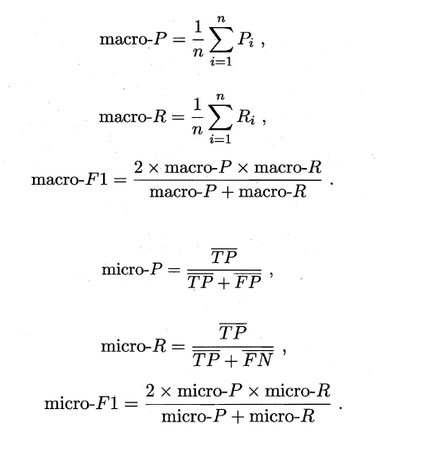    
- `ROC和AUC`:学习器对测试样本的评估结果一般为一个实值或概率，设定一个**阈值**，大于阈值为正例，小于阈值为负例，因此这个实值的好坏直接决定了学习器的泛化性能，若将这些实值排序(把最可能是正例的样本排在前面，最不可能是正例的排在后面)，根据应用场景(如更重视查准率，则可选择靠前的阈值，反之，如重视查全率，则可选择靠后的阈值)，故排序的好坏决定了学习器的性能高低。ROC曲线正是从这个角度出发来研究学习器的泛化性能，ROC曲线与P-R曲线十分类似，都是按照排序的顺序逐一按照正例预测，不同的是ROC曲线以“真正例率”（True Positive Rate，简称TPR）为横轴，纵轴为“假正例率”（False Positive Rate，简称FPR），ROC偏重研究基于测试样本评估值的排序好坏。   
`真正例率TPR`：正确的预测为正的数量占原本为正的数量的比例，即TP/(TP+FN)    
`假正例率FPR`：错误的预测为正的数量占原本为负的数量的比例，即FP/(FP+TN)      
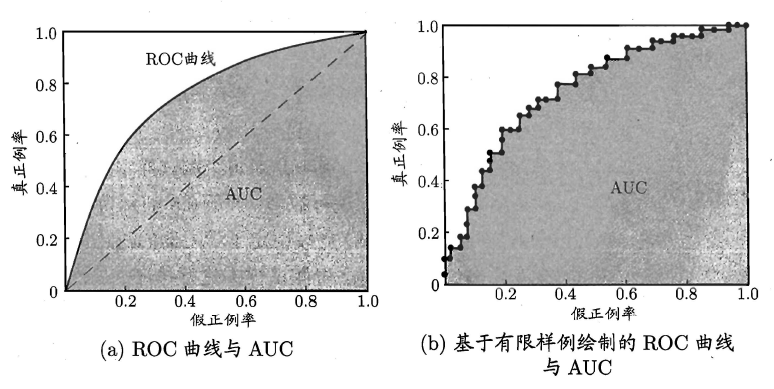    
由图可知：（0,0）表示将所有的样本预测为负例，（1,1）则表示将所有的样本预测为正例，（0,1）表示正例全部出现在负例之前的理想情况，（1,0）则表示负例全部出现在正例之前的最差情况。对角线对应于**随机猜想**。    
ROC曲线的绘制步骤：
1. 将测试样本按照预测值排序。
2. 把阈值设为最大，即把所有样本都预测为反例(TP=FP=0)，此时TPR=0，FPR=0,坐标（0,0）。
3. 将阈值依次设为每个样例的预测值，即依次将每个样例划分为正例。
4. 计算每个阈值下的TPR和FPR，并绘制坐标点。
  
我们期望TPR大而FPR小，即曲线越靠近左上角，分类性能越好。进行模型的性能比较时，若一个学习器A的ROC曲线被另一个学习器B的ROC曲线完全包住，则称B的性能优于A。若A和B的曲线发生了交叉，则谁的曲线下的面积大，谁的性能更优。ROC曲线下的面积定义为AUC（Area Uder ROC Curve），不同于P-R的是，这里的AUC是可估算的，即AOC曲线下每一个小矩形的面积之和。易知：AUC越大，证明排序的质量越好，AUC为1时，证明所有正例排在了负例的前面，AUC为0时，所有的负例排在了正例的前面。     
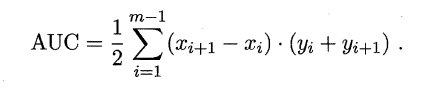



In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression()  # 创建逻辑回归分类器对象
clf.fit(X_train, y_train)   # 利用训练集 X_train 和 y_train 进行模型训练
y_score = clf.predict_proba(X_test)[:, 1]  # 使用训练好的模型对测试集 X_test 进行预测，并提取预测为正例的概率
fpr, tpr, thresholds = roc_curve(y_test, y_score)  # 计算 ROC 曲线
auc_score = roc_auc_score(y_test, y_score) # 计算 AUC 值

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')  # 绘制ROC曲线，标注AUC的值
# 随机分类器没有分类能力，其FPR=TPR。随机分类器的性能通常表示为ROC曲线上的对角线
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')  # 绘制随机分类器的ROC曲线
plt.xlabel('False Positive Rate')  # x轴标签为FPR
plt.ylabel('True Positive Rate')   # y轴标签为TPR
plt.title('ROC Curve')             # 设置标题
plt.legend()                    
plt.show()                        # 显示图形

- `代价敏感错误率与代价曲线（难）`:上面的方法中，将学习器的犯错同等对待，但在现实生活中，将正例预测成假例与将假例预测成正例的代价常常是不一样的，例如：将无疾病误判为有疾病只是增多了检查，但有疾病误判为无疾病却是增加了生命危险。以二分类为例，由此引入了“代价矩阵”（cost matrix）。     
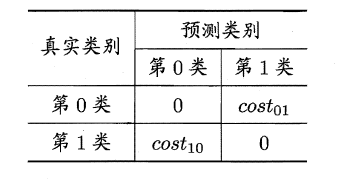     
在非均等错误代价下，我们希望的是最小化“总体代价”，这样“代价敏感”的错误率为：     
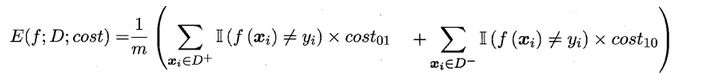    
代价曲线的绘制很简单：设ROC曲线上一点的坐标为(TPR，FPR) ，则可相应计算出FNR，然后在代价平面上绘制一条从(0，FPR) 到(1，FNR) 的线段，线段下的面积即表示了该条件下的期望总体代价；如此将ROC 曲线土的每个点转化为代价平面上的一条线段，然后取所有线段的下界，围成的面积即为在所有条件下学习器的期望总体代价，如图所示：    
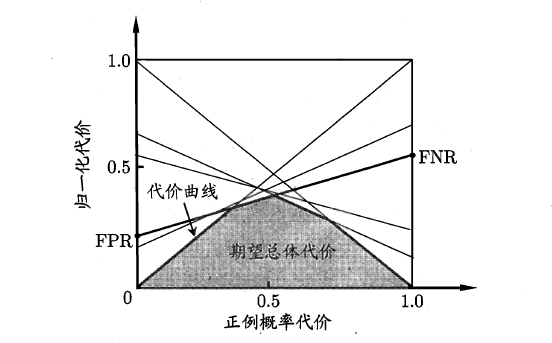

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 模拟函数输出打分(0到11)
output_score = list(range(12))
# 模拟正确分类结果（以二分类为例）
y = [0,0,0,0,1,0,1,1,0,1,1,1]
# 设定p，即集合中正例比例（0到1）
p = list(range(0,11,1))
p = [i/10 for i in p]
# 设定代价
cost01 = 3
cost10 = 2
# 设定阈值
theta = list(range(12))
theta = [i+0.5 for i in theta]

# 阈值判断函数
def threshold_judge(score, theta):
    output_result = []
    for i in score:
        if score[i] >= theta:
            output_result.append(1)
        else:
            output_result.append(0)
    return output_result

# 计算正例和负例的数量
def count_positive_negative(y):
    result = pd.value_counts(y)
    return result[1], result[0]

# 计算混淆矩阵
def confusion_matrix(y_true, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            TN += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP += 1
        else:
            FN += 1
    return TP, FN, FP, TN

# 计算FNR和FPR,保留4位小数
def calculate_FNR_FPR(TP, FN, FP, TN):
    FNR = round(FN / (TP + FN), 4)
    FPR = round(FP / (FP + TN), 4)
    return FNR, FPR

# 计算正概率代价
def calculate_positive_cost(p, cost01, cost10):
    positive_costs = []
    for i in range(len(p)):
        positive_cost = round((p[i] * cost01)/(p[i] * cost01 + (1-p[i]) * cost10), 4)
        positive_costs.append(positive_cost)
    return positive_costs

# 计算归一化总概率
def calculate_normalized_total_probability(p, cost01, cost10,FNR, FPR):
    costs_norm = []
    for i in range(len(p)):
        cost_norm = round((FNR * p[i] *cost01 + FPR * (1-p[i])*cost01)/(p[i] * cost01 + (1-p[i])*cost10), 4)
        costs_norm.append(cost_norm)
    return costs_norm

# 计算每一个theta对应的点的函数，并写在列表里
def calculate_Pcost_Cnorm(thetas, output_score, y):
    Pcost_n = []
    Cnorm_n = []
    theta_FPR_FNR = {}
    for i in range(len(thetas)):
        # 取出当前theta
        theta = thetas[i]
        # 计算输出结果
        output_result = threshold_judge(output_score, theta)
        # 统计正例和负例的数量
        positive_num, negative_num = count_positive_negative(y)
        # 计算混淆矩阵
        TP, FN, FP, TN = confusion_matrix(y, output_result)
        # 计算FNR和FPR
        FNR, FPR = calculate_FNR_FPR(TP, FN, FP, TN)
        theta_FPR_FNR[theta] = [FPR, FNR]
        # 计算正例概率代价
        Pcost = calculate_positive_cost(p, cost01, cost10)
        Pcost_n.append(Pcost)
        # 计算归一化总概率
        Cnorm = calculate_normalized_total_probability(p, cost01, cost10,FNR, FPR)
        Cnorm_n.append(Cnorm)
    return Pcost_n, Cnorm_n, theta_FPR_FNR

# ----- 主程序开始 ------
Pcost_n, Cnorm_n, theta_FPR_FNR = calculate_Pcost_Cnorm(theta, output_score, y)

# 画出图像
for i in range(len(Pcost_n)):
    plt.plot(Pcost_n[i], Cnorm_n[i],'r')
plt.show()

# 查看每个theta对应的FPR和FNR
print(theta_FPR_FNR)

### 2.4 比较检验
在比较学习器泛化性能的过程中，统计假设检验（hypothesis test）为学习器性能比较提供了重要依据，即若A在某测试集上的性能优于B，那A学习器比B好的把握有多大。 为方便论述，本篇中都是以“错误率”作为性能度量的标准。   
- `假设检验`:“假设”指的是对样本总体的分布或已知分布中某个参数值的一种猜想，例如：假设总体服从泊松分布，或假设正态总体的期望u=u0。回到本篇中，我们可以通过测试获得测试错误率，但直观上测试错误率和泛化错误率相差不会太远，因此可以通过测试错误率来推测泛化错误率的分布，这就是一种假设检验。     
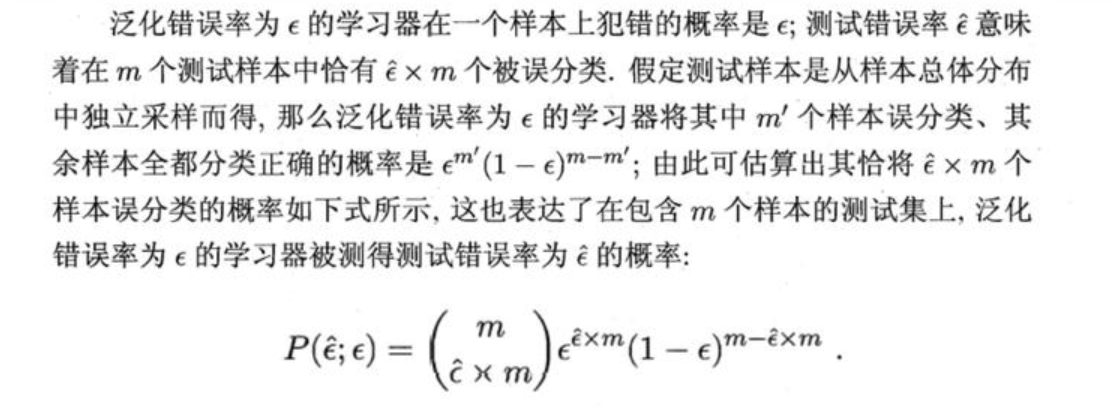     


In [ ]:
from scipy.special import comb
import matplotlib.pyplot as plt
# 全部数据为ALL，假设模型在ALL上的错误率为0.3
e_all = 0.3
# 测试集为T，T样本量为10，模型在T上判断的错误数为6
m_T = 10
m_T_error = 6
# 计算模型在T上的错误率
e_T = round(m_T_error / m_T,4)
# 出现这种可能的概率
def calculate_p(m_T, m_T_error):
    p = comb(m_T, m_T_error) * (e_all ** m_T_error) * ((1 - e_all) ** (m_T - m_T_error))
    p = round(p, 4)
    return p
# 出现每种情况的概率
def calculate_p_all(m_T):
    m_T_error_list = list(range(m_T + 1))
    p_list = []
    for i in range(len(m_T_error_list)):
        m_T_error = m_T_error_list[i]
        p = calculate_p(m_T, m_T_error)
        p_list.append(p)
    return m_T_error_list,p_list
# 绘制错误率与出现概率的曲线
m_T_error_list, p_list = calculate_p_all(m_T)
plt.scatter(m_T_error_list, p_list,s=20,c='r',alpha=0.5)
plt.show()

假设检验的核心思想：先设定好α值，然后根据样本数据计算出样本均值和样本方差，根据假设检验的原假设和备择假设，计算出临界值，然后根据样本数据和临界值，判断样本数据是否在统计学意义上显著。     
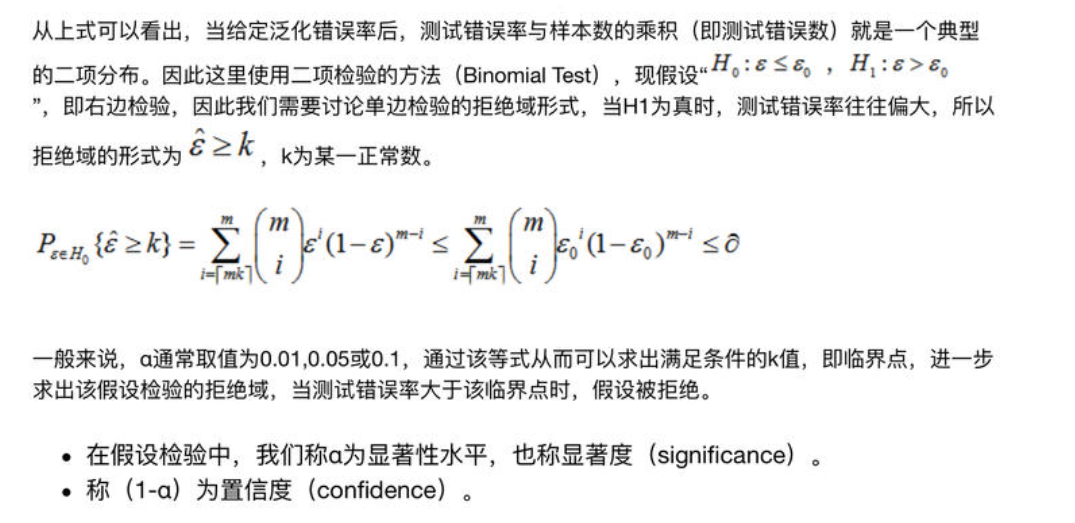       
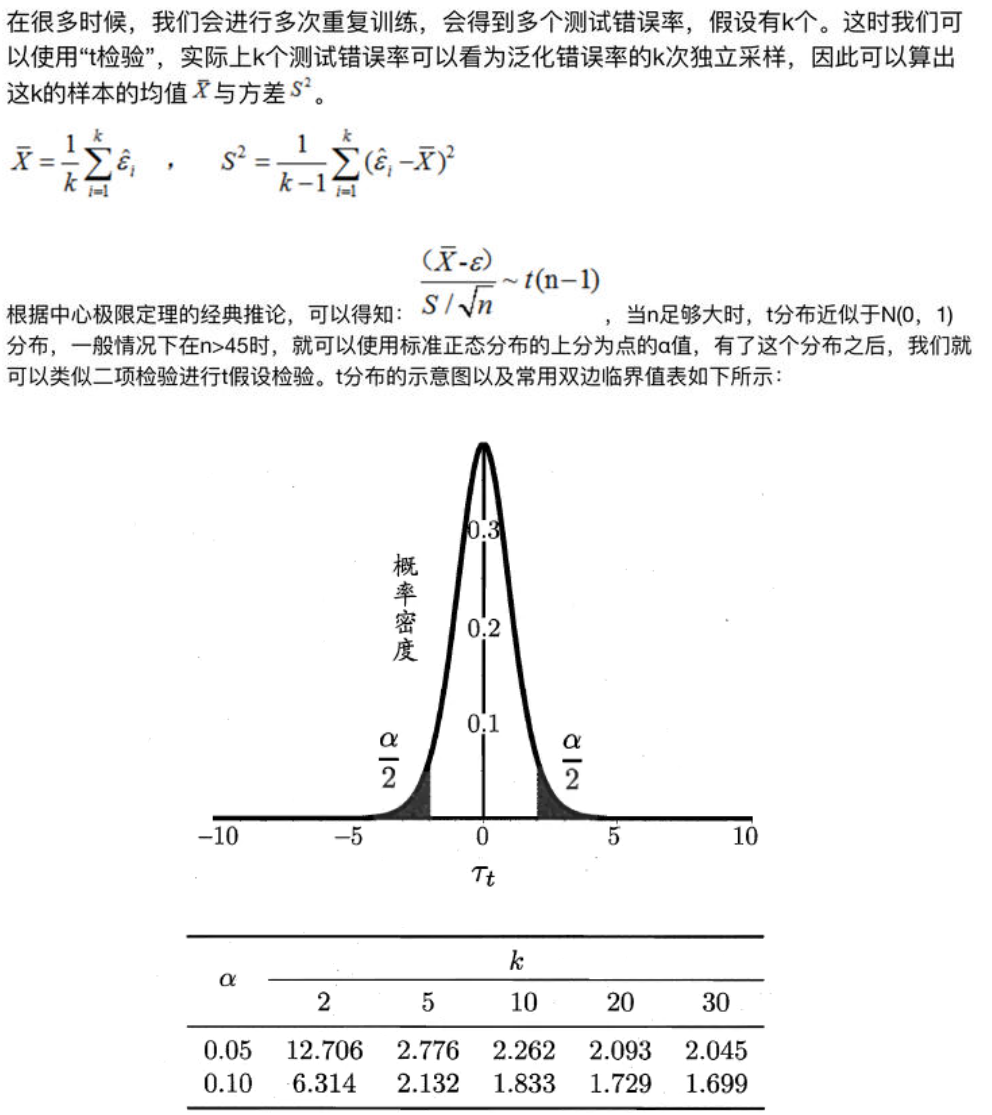     
- `交叉检验t检验`:     
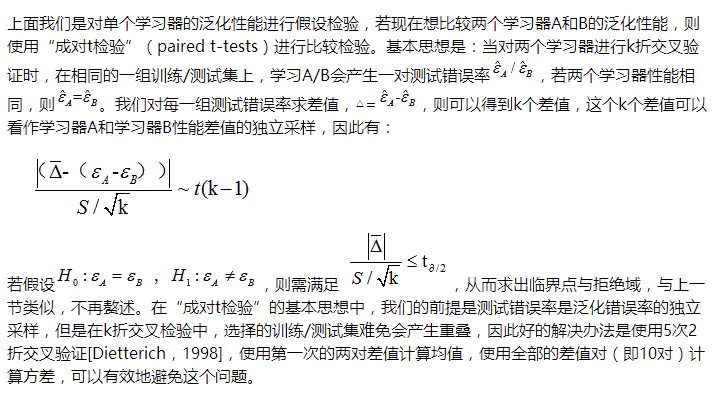    
- `McNemar检验`:MaNemar主要用于二分类问题，与成对t检验一样也是用于比较两个学习器的性能大小。主要思想是：若两学习器的性能相同，则A预测正确B预测错误数应等于B预测错误A预测正确数，即e01=e10，且|e01-e10|服从N（1，e01+e10）分布。   
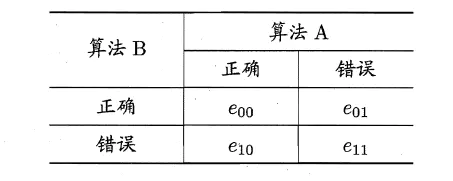    
因此，如下所示的变量服从自由度为1的卡方分布，即服从标准正态分布N（0,1）的随机变量的平方和，下式只有一个变量，故自由度为1，检验的方法同上：做出假设-->求出满足显著度的临界点-->给出拒绝域-->验证假设。   
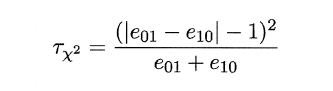    
- `Friedman检验与Nemenyi校正`:上述的三种检验都只能在一组数据集上，F检验则可以在多组数据集进行多个学习器性能的比较，基本思想是在同一组数据集上，根据测试结果（例：测试错误率）对学习器的性能进行排序，赋予序值1,2,3...，相同则平分序值，如下图所示：    
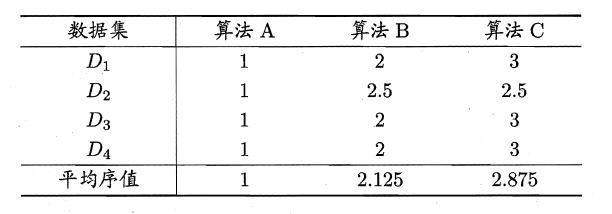    
若学习器的性能相同，则它们的平均序值应该相同，且第i个算法的平均序值ri服从正态分布N（（k+1）/2，（k+1）(k-1)/12），则有：    
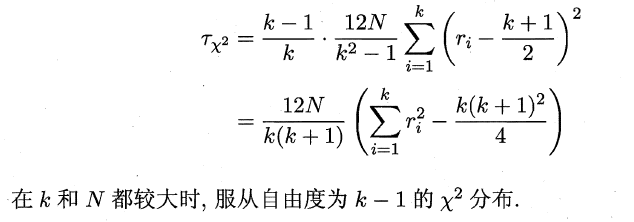   
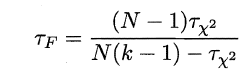   
服从自由度为k-1和(k-1)(N-1)的F分布。下面是F检验常用的临界值：  
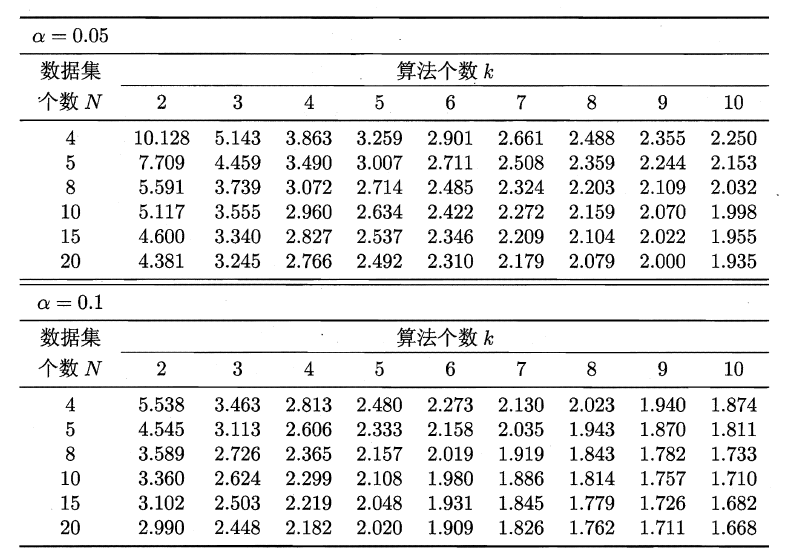    
若“H0：所有算法的性能相同”这个假设被拒绝，则需要进行后续检验，来得到具体的算法之间的差异。常用的就是Nemenyi后续检验。Nemenyi检验计算出平均序值差别的临界值域，下表是常用的qa值，若两个算法的平均序值差超出了临界值域CD，则相应的置信度1-α拒绝“两个算法性能相同”的假设。   
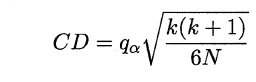    
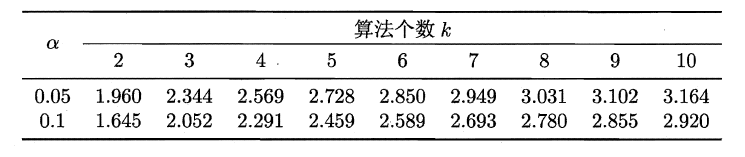     


### 2.5 偏差与方差
偏差-方差分解是解释学习器泛化性能的重要工具。在学习算法中，偏差指的是预测的期望值与真实值的偏差，方差则是每一次预测值与预测值得期望之间的差均方。实际上，偏差体现了学习器预测的准确度，而方差体现了学习器预测的稳定性。通过对泛化误差的进行分解，可以得到：
- 泛化误差=偏差+方差+噪声
- 偏差=期望预测值与真实值之间的差，刻画了学习器的拟合能力
- 方差=每一次预测值与预测值得期望之间的差的期望，刻画了学习器的稳定性
- 噪声=不可避免的随机因素，比如数据扰动、噪声、过拟合等，刻画了学习问题本身的复杂性。  
 
方差和偏差具有矛盾性，这就是常说的偏差-方差窘境（bias-variance dilamma），随着训练程度的提升，期望预测值与真实值之间的差异越来越小，即偏差越来越小，但是另一方面，随着训练程度加大，学习算法对数据集的波动越来越敏感，方差值越来越大。换句话说：在欠拟合时，偏差主导泛化误差，而训练到一定程度后，偏差越来越小，方差主导了泛化误差。因此训练也不要贪杯，适度辄止。   
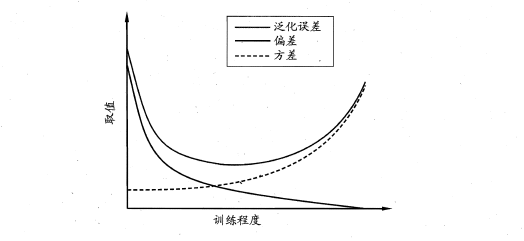

## 第三章 线性模型
### 3.1 线性回归
线性回归问题就是试图学到一个线性模型尽可能准确地预测新样本的输出值，例如：通过历年的人口数据预测2017年人口数量。在这类问题中，往往我们会先得到一系列的有标记数据，例如：2000-->13亿...2016-->15亿，这时输入的属性只有一个，即年份；也有输入多属性的情形，假设我们预测一个人的收入，这时输入的属性值就不止一个了，例如：（学历，年龄，性别，颜值，身高，体重）-->15k。   
有时这些输入的属性值并不能直接被我们的学习模型所用，需要进行相应的处理，对于连续值的属性，一般都可以被学习器所用，有时会根据具体的情形作相应的预处理，例如：归一化等；对于离散值的属性，可作下面的处理：    
- 若属性值之间存在“序关系”，则可以将其转化为连续值，例如：身高属性分为“高”“中等”“矮”，可转化为数值：{1,0.5,0}。
- 若属性值之间不存在“序关系”，则通常将其转化为向量的形式，例如：性别属性分为“男”“女”，可转化为二维向量：{(1,0)，(0，1)}。  
1. 当输入属性只有一个时，先假设f(x)=wx+b,计算每个样本x输入下对应的y值，再计算均方误差（MSE），对w和b进行求导，得到最优解w^和b^。    
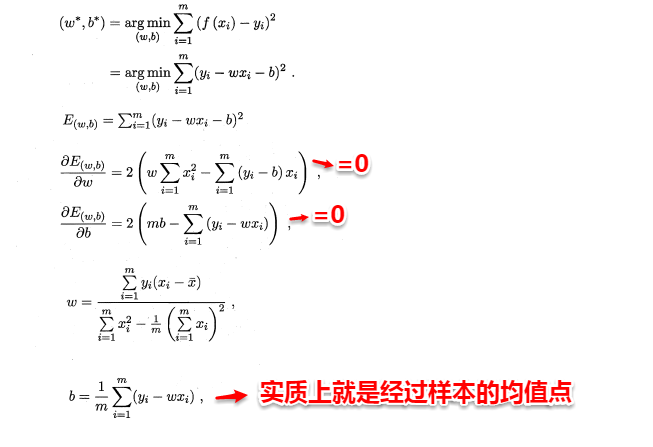    
2. 当输入属性有多个的时候，例如对于一个样本有d个属性{(x1,x2...xd)}，则y=wx+b需要写成：    
    
通常对于多元问题，常常使用矩阵的形式来表示数据。在本问题中，将具有m个样本的数据集表示成矩阵X，将系数w与b合并成一个列向量，这样每个样本的预测值以及所有样本的均方误差最小化就可以写成下面的形式：    
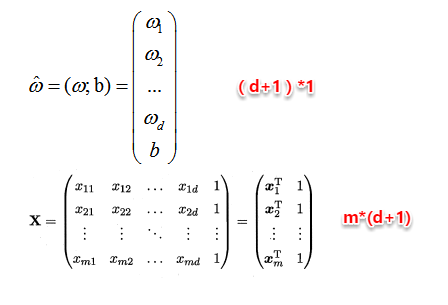    
同样地，我们使用`最小二乘法`对w和b进行估计，令均方误差的求导等于0，需要注意的是，当一个矩阵的行列式不等于0时，我们才可能对其求逆，因此对于下式，我们需要考虑矩阵（X的转置*X）的行列式是否为0，若不为0，则可以求出其解，若为0，则需要使用其它的方法进行计算，书中提到了引入正则化，此处不进行深入。    
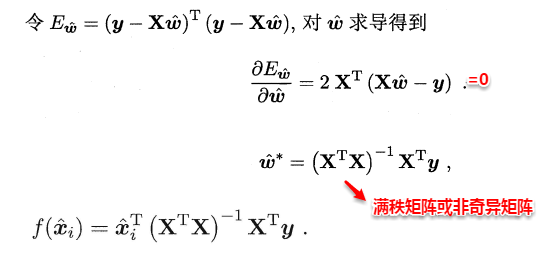    
另一方面，有时像上面这种原始的线性回归可能并不能满足需求，例如：y值并不是线性变化，而是在指数尺度上变化。这时我们可以采用线性模型来逼近y的衍生物，例如lny，这时衍生的线性模型如下所示，实际上就是相当于将指数曲线投影在一条直线上，如下图所示：    
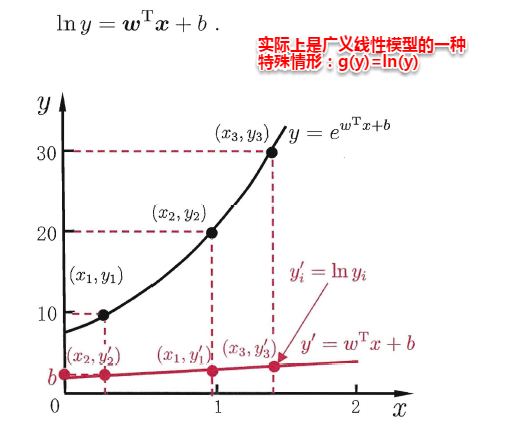    
更一般地，考虑所有y的衍生物的情形，就得到了“广义的线性模型”（generalized linear model），其中，g（*）称为联系函数（link function）。   
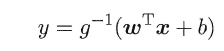


[[4.25186821]
 [2.95912104]]


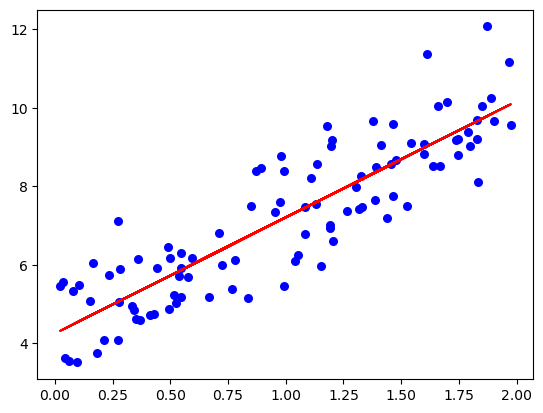

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
#生成从0到2之间100行1列的随机数
x = 2 * np.random.rand(100,1)
#生成从4到7之间100行1列的随机数
Y = 4 + 3 * x + np.random.randn(100,1)
#在X的第一列添加1 [1,X]
X_b = np.c_[np.ones((100,1)), x] 
#计算回归系数(XᵀX)⁻¹XᵀY,其中XᵀX是非奇异
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
#打印回归系数
print(theta_best)
#绘制theata_best的图形 
plt.scatter(x, Y, c='b',s=30)
plt.plot(x, X_b.dot(theta_best), 'r-')
plt.show()

### 3.2 对数几率回归（分类任务）
回归就是通过输入的属性值得到一个预测值，利用上述广义线性模型的特征，通过一个**联系函数**，将预测值转化为离散值从而进行分类（函数复合），线性几率回归正是研究这样的问题。对数几率引入了一个对数几率函数（logistic function）,将预测值投影到0-1之间，从而将线性回归问题转化为二分类问题。  
为了保证y(.)单调可微，我们不直接使用符号函数，而是使用**Sigmoid函数**，其是通过微分方程y'= y(1-y)求得。   
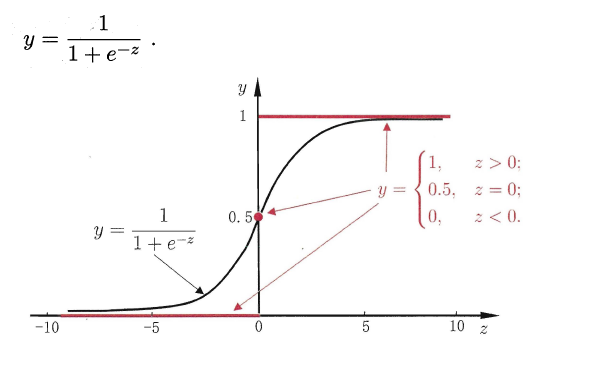    
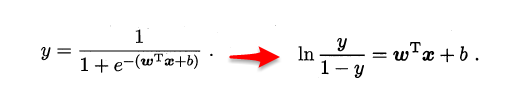    
若将y看做样本为正例的概率，（1-y）看做样本为反例的概率，则上式实际上使用线性回归模型的预测结果器逼近真实标记的对数几率。因此这个模型称为“对数几率回归”（logistic regression），也有一些书籍称之为“逻辑回归”。下面使用最大似然估计的方法来计算出w和b两个参数的取值，下面只列出求解的思路，不列出具体的计算过程。    
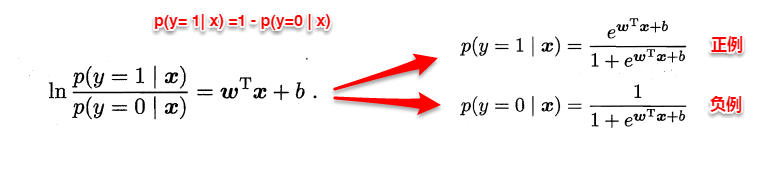     
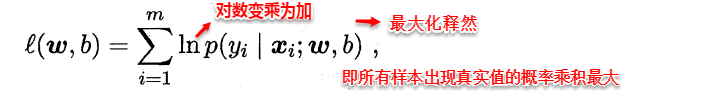

模型参数: [-3.65153202 18.13566179 -1.22475842]
测试集准确率: 0.8333333333333334


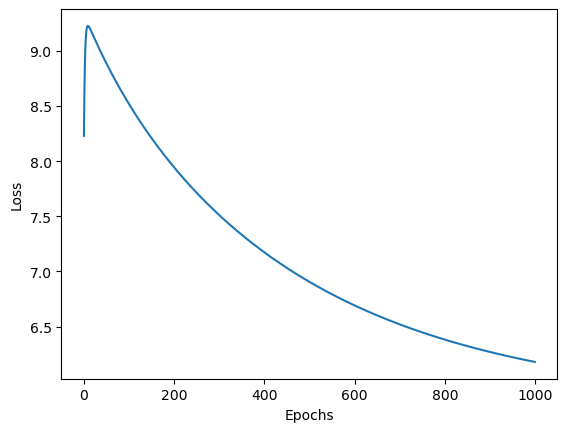

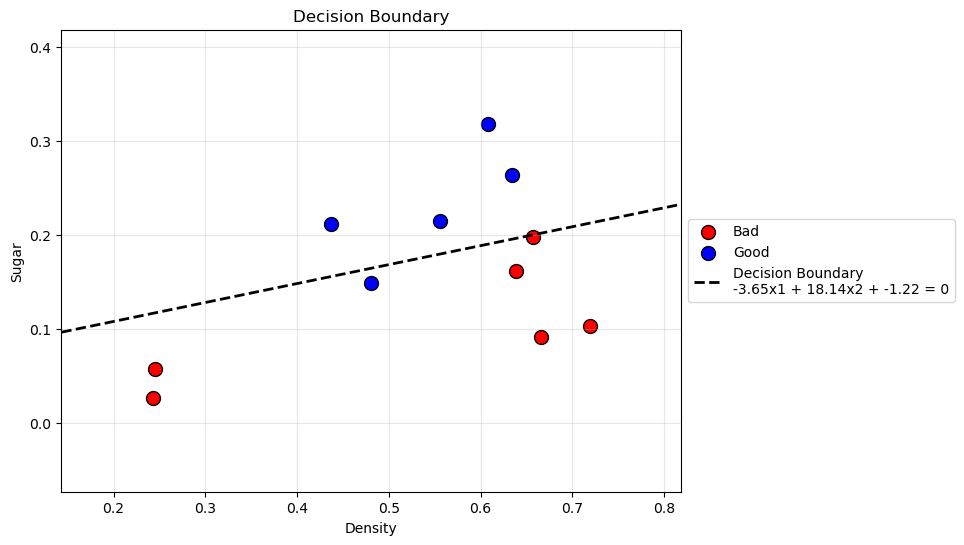

In [7]:
#########手动编程进行逻辑回归#########
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

class LogisticRegression:
    def __init__(self,fit_intercept=True,method='batch',
                 learning_rate=0.1,max_iter=1000,random_state=None):
        """
        逻辑回归分类器
        
        参数:
        - fit_intercept: 是否添加偏置项 (默认True)
        - method: 优化方法 ['batch'(批量梯度下降), 'stochastic'(随机梯度下降)] (默认'batch')
        - learning_rate: 学习率 (默认0.1)
        - max_iter: 最大迭代次数 (默认500)
        - random_state: 随机种子 (默认None)
        """
        self.fit_intercept = fit_intercept
        self.method = method
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.beta = None
        self.loss_history = []

    def add_intercept(self,X):
        """设置偏置项(X,1)"""
        if self.fit_intercept:
            return np.c_[X,np.ones(X.shape[0])]
        else:
            return X
        
    def sigmoid(self,z):
        """sigmoid函数"""
        return 1.0 / (1.0 + np.exp(-z))
    
    def loss(self,X,y):
        """计算似然损失(3.27)"""
        z = X @ self.beta
        loss_terms = -y * z + np.log(1 + np.exp(-z))
        return np.sum(loss_terms)

    def batch_gradient_step(self,X,y):
        """批量梯度下降更新参数(3.30)""" 
        p = self.sigmoid(X @ self.beta)
        gradent = X.T @ (p - y)
        self.beta -= self.learning_rate * gradent

    def stochastic_gradient_step(self,X,y):
        """随机梯度下降更新参数(一次随机更新一个方向)"""
        for i in range(X.shape[0]):
             p = self.sigmoid(X[i] @ self.beta)
             gradent = X[i] * (p - y[i])
             self.beta -= self.learning_rate * gradent
        
    def fit(self,X,y):
        """
        训练模型
        
        参数:
        - X: 特征矩阵 (n_samples, n_features)
        - y: 标签向量 (n_samples,)
        """

        # 数据预处理(m个数据，n-1个特征)
        X = self.add_intercept(X)
        m,n = X.shape
        self.beta = np.zeros(n)

        # 设置随机种子
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # 选择优化方法
        if self.method == 'batch':
            optimizer = self.batch_gradient_step
        elif self.method =='stochastic':
            optimizer = self.stochastic_gradient_step
        else:
            raise ValueError("method must be 'batch' or'stochastic'")

        # 训练模型
        for epoch in range(self.max_iter):
            # 随机梯度下降每次迭代后随机打乱数据
            if self.method == 'stochastic':
                X,y = shuffle(X,y)

            # 执行一次梯度下降更新
            optimizer(X,y)

            # 记录损失
            self.loss_history.append(self.loss(X,y))

        return self
    
    def predict_proba(self,X):
        """返回预测概率"""
        X = self.add_intercept(X)
        return self.sigmoid(X @ self.beta)
    
    def predict(self,X):
        """返回预测类别"""
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)

    def score(self,X,y):
        """计算准确率"""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def plot_loss_curve(self):
        """绘制损失变化图"""
        plt.plot(self.loss_history)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

    def plot_decision_boundary(self,X,y):
        """绘制决策边界"""
        if X.shape[1] != 2:
            raise ValueError("只支持二维特征可视化!")
        # 提取模型参数
        w1, w2, b = self.beta[0], self.beta[1], self.beta[2]
        
        # 生成网格点坐标
        x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
        y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
        xx = np.linspace(x_min, x_max, 100)
        
        # 计算决策边界直线方程：w1*x1 + w2*x2 + b = 0 → x2 = (-w1*x1 -b)/w2
        decision_line = (-w1 * xx - b) / w2
        
        # 创建画布
        plt.figure(figsize=(8,6))
        
        # 绘制原始数据点
        plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', 
                    edgecolor='k', s=100, label='Bad')
        plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', 
                    edgecolor='k', s=100, label='Good')
        
        # 绘制决策边界
        plt.plot(xx, decision_line, 'k--', lw=2, 
                label=f'Decision Boundary\n{w1:.2f}x1 + {w2:.2f}x2 + {b:.2f} = 0')
        
        # 美化显示
        plt.xlabel("Density")
        plt.ylabel("Sugar")
        plt.title("Decision Boundary")
        plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.grid(alpha=0.3)
        plt.show()
        

if __name__ == '__main__':
    # 加载数据
    dataset = np.loadtxt('../machine learning note/watermelon_3a.csv', delimiter=',')
    X = dataset[:, 1:3]
    y = dataset[:, 3]

    # 划分数据集(0.3的测试集)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 初始化模型(批量梯度下降)
    model = LogisticRegression(
        method='batch',       
        learning_rate=0.1,
        max_iter=1000,
        random_state=42
    )

    # 训练模型
    model.fit(X_train, y_train)

    # 评估模型
    print("模型参数:", model.beta)
    print("测试集准确率:", model.score(X_test, y_test))

    # 损失可视化
    model.plot_loss_curve()

    # 决策边界可视化
    model.plot_decision_boundary(X_train, y_train)


### 3.3 线性判别分析（Linear Discriminant Analysis，LDA）
LDA是一种降维技术，它通过寻找一个新的低维空间，使得同类样本在这个低维空间中的分布尽可能的相似，不同类样本在这个低维空间中的分布尽可能的分离。     
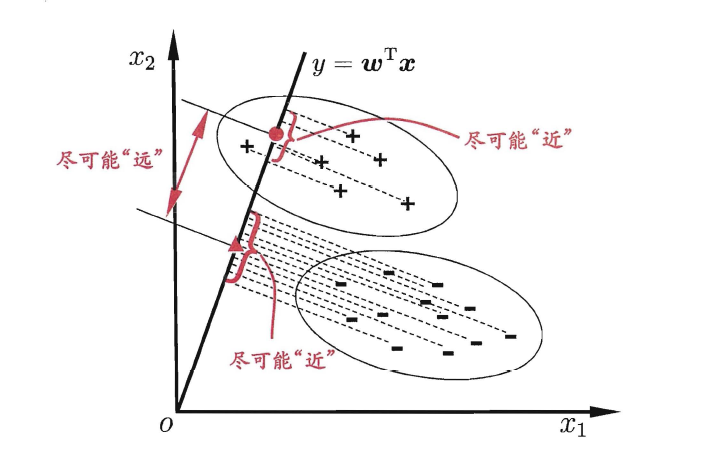     
想让同类样本点的投影点尽可能接近，不同类样本点投影之间尽可能远，即：让各类的协方差之和尽可能小，不用类之间中心的距离尽可能大。基于这样的考虑，LDA定义了两个散度矩阵。     
- 类内散度矩阵（within-class scatter matrix）   
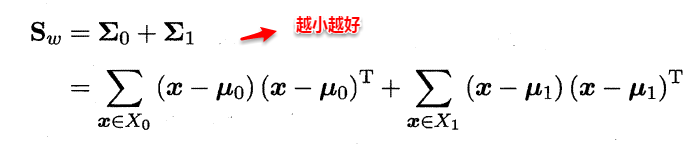    
其中μi是第i类的**均值向量**，Σi是第i类的协方差矩阵。  
- 类间散度矩阵（between-class scatter matrix）   
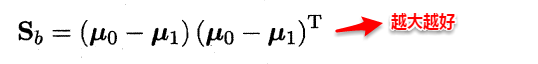    
因此得到了LDA的最大化目标：“广义瑞利商”（generalized Rayleigh quotient）。   
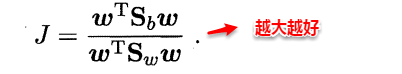    
可知J的值越大，就越符合LDA的目标。观察目标函数J可得，若w'是其解时，对于任意常数α来说，αw'也是目标函数的解，也就是说目标函数的目标解与w的长度无关，而与其方向有关。鉴于此，可令分母为1，利用拉格朗日乘子法：   
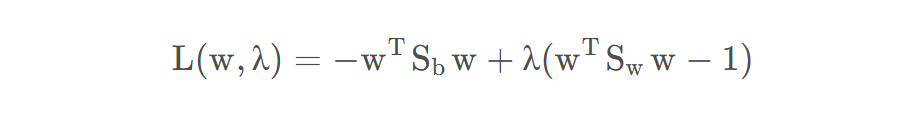    
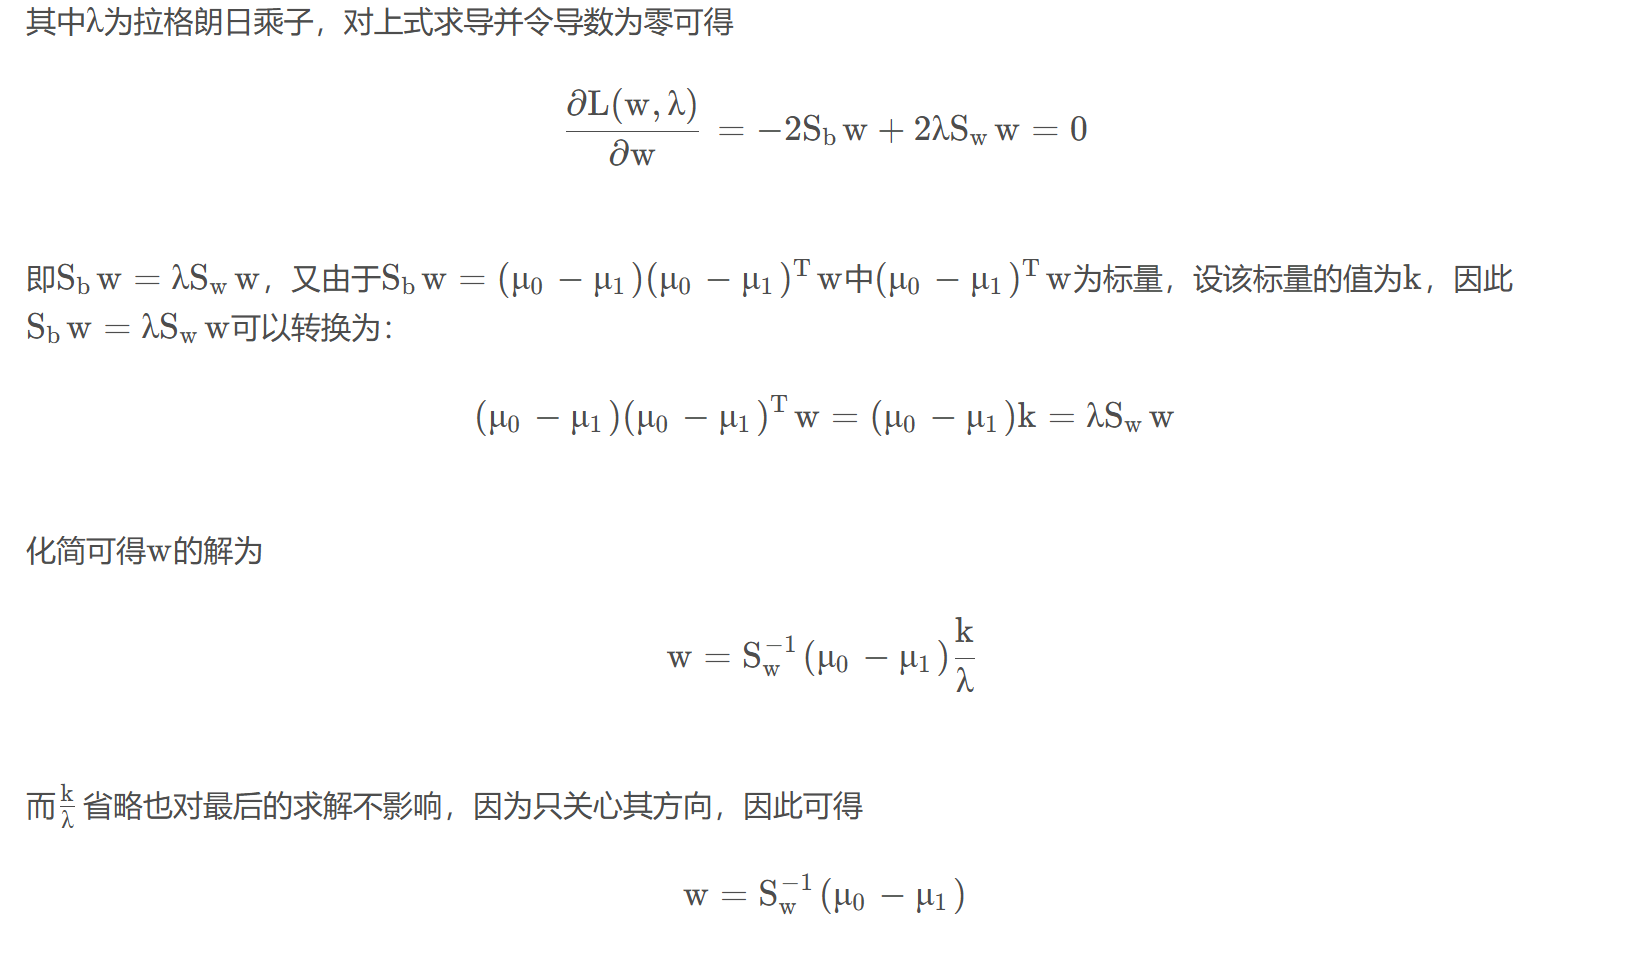   
若将w看做一个投影矩阵，类似PCA的思想，则LDA可将样本投影到N-1维空间（N为类簇数），投影的过程使用了类别信息（标记信息），因此LDA也常被视为一种经典的监督降维技术。    


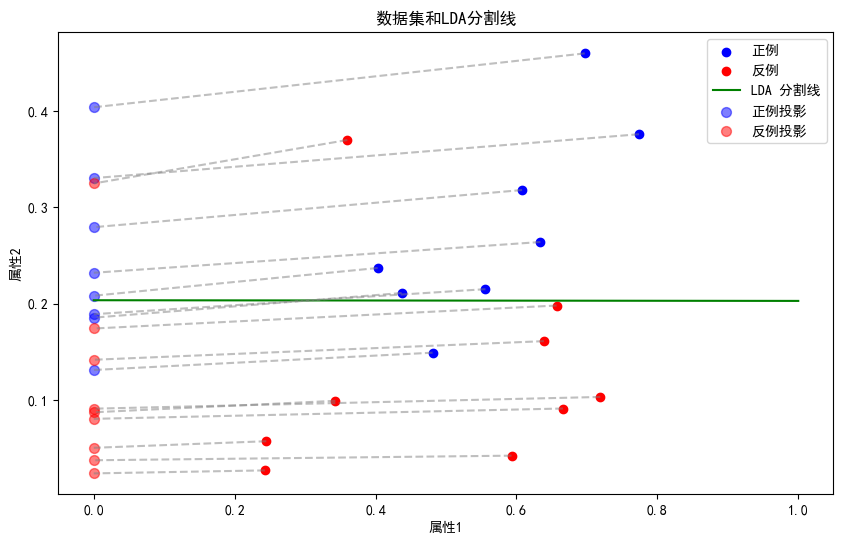

投影向量为：[-6.62487509e-04 -9.36728168e-01]
LDA分割线的方程为：y = -0.0007072356012724977x + 0.20351443304420846


In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文显示字体
plt.rcParams['axes.unicode_minus'] = False   # 正确显示负号

# 数据准备
dataset = np.loadtxt('../machine learning note/watermelon_3a.csv', delimiter=',')
X = dataset[:,1:3]
y = dataset[:,3]

# 计算正例和反例的均值向量
mu_0 = np.mean(X[y == 0], axis=0)
mu_1 = np.mean(X[y == 1], axis=0)

# 计算类内散度矩阵,Sw = ∑(xi - μ0)(xi - μ0)T + ∑(xi - μ1)(xi - μ1)T
S_w = np.zeros((2, 2))
for i in range(len(X)):
 if y[i] == 0:
        S_w += np.outer(X[i] - mu_0, X[i] - mu_0)
 else:
        S_w += np.outer(X[i] - mu_1, X[i] - mu_1)

# 计算最优投影方向，w = Sw^-1(μ0 - μ1)
w_prime = np.linalg.inv(S_w).dot(mu_0 - mu_1)

# 计算LDA分割线（决策边界），决策边界垂直于投影向量w_prime，且通过两个类别均值的中点
mid_point = (mu_0 + mu_1) / 2
slope = w_prime[1] / w_prime[0]

# 计算垂直于投影向量的斜率
slope_perpendicular = -1 / slope

# 计算截距
intercept_perpendicular = mid_point[1] - slope_perpendicular * mid_point[0]

# 绘制数据点
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='正例')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='反例')

# 绘制LDA分割线
x_values = np.linspace(0, 1, 100)  # x值
y_values = slope_perpendicular * x_values + intercept_perpendicular  # 对应的y值
plt.plot(x_values, y_values, color='green', label='LDA 分割线')

# 计算每个数据点在投影方向上的投影点
X_projected = X.dot(w_prime)

# 创建一个用于投影的二维数组
w_prime_2d = np.array([w_prime[0], w_prime[1]])
X_projected_points = X_projected[:, np.newaxis] * w_prime_2d

# 绘制投影点
plt.scatter(X_projected_points[y == 1][:, 0], X_projected_points[y == 1][:, 1], color='blue', s=50, alpha=0.5, label='正例投影')
plt.scatter(X_projected_points[y == 0][:, 0], X_projected_points[y == 0][:, 1], color='red', s=50, alpha=0.5, label='反例投影')

# 绘制从数据点到投影点的线段
for i in range(len(X)):
    plt.plot([X[i][0], X_projected_points[i][0]], [X[i][1], X_projected_points[i][1]], color='gray', linestyle='--', alpha=0.5)

# 其他图形设置
plt.xlabel('属性1')
plt.ylabel('属性2')
plt.legend()
plt.title('数据集和LDA分割线')
plt.show()

# 输出投影向量
print(f'投影向量为：{w_prime}')
# 输出LDA分割线的方程
print(f'LDA分割线的方程为：y = {slope_perpendicular}x + {intercept_perpendicular}')

### 3.4 多分类学习
现实中我们经常遇到不只两个类别的分类问题，即多分类问题，在这种情形下，我们常常运用“拆分”的策略，通过多个二分类学习器来解决多分类问题，即将多分类问题拆解为多个二分类问题，训练出多个二分类学习器，最后将多个分类结果进行集成得出结论。最为经典的拆分策略有三种：“一对一”（OvO）、“一对其余”（OvR）和“多对多”（MvM）。    
- OvO：给定数据集D，假定其中有N个真实类别，将这N个类别进行**两两配对**（一个正类/一个反类），从而产生N（N-1）/2个二分类学习器，在测试阶段，将新样本放入所有的二分类学习器中测试，得出N（N-1）个结果，最终通过投票产生最终的分类结果。
- OvM：给定数据集D，假定其中有N个真实类别，每次**取出一个类作为正类**，剩余的所有类别作为一个新的反类，从而产生N个二分类学习器，在测试阶段，得出N个结果，若仅有一个学习器预测为正类，则对应的类标作为最终分类结果。若有多个分类器预测为正例，则分别考虑各预测器的预测置信度，选择置信度最大的作为最终结果。   
- MvM：给定数据集D，假定其中有N个真实类别，每次取若干个类作为正类，若干个类作为反类（通过ECOC码给出，编码），若进行了M次划分，则生成了M个二分类学习器，在测试阶段（解码），得出M个结果组成一个新的码，最终通过计算海明/欧式距离选择距离最小的类别作为最终分类结果。    
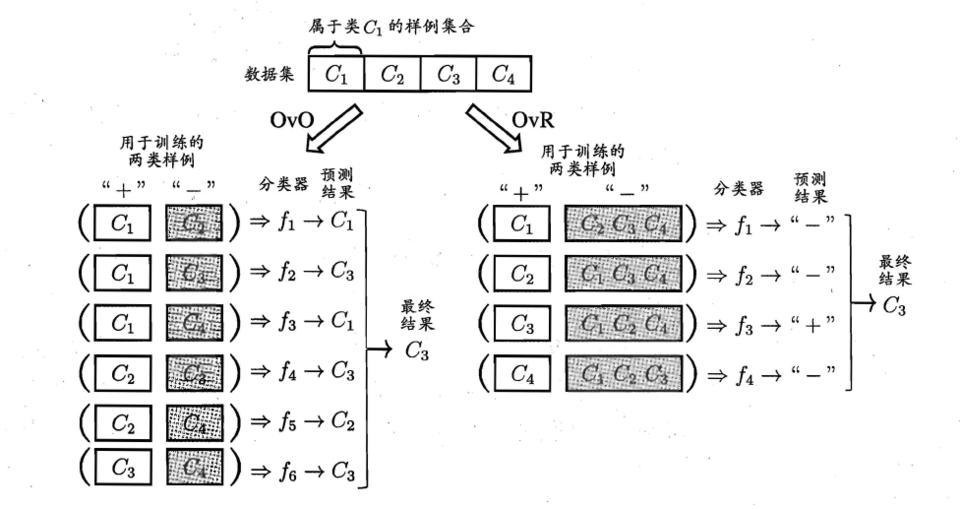    
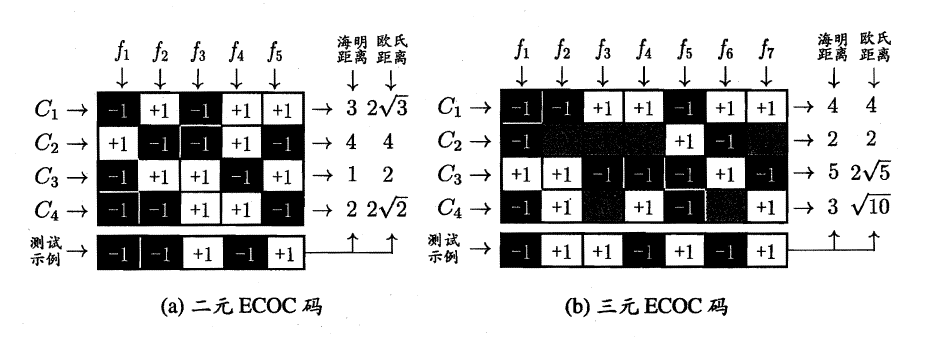   
### 3.5 类别不平衡问题
类别不平衡（class-imbanlance）就是指分类问题中不同类别的训练样本相差悬殊的情况，例如正例有900个，而反例只有100个，这个时候我们就需要进行相应的处理来平衡这个问题。常见的做法有三种：  
1. 欠采样（Under-sampling）：从训练集中删除一些反例，使得正反例的数量差距最小化。常见的算法有：EasyEnsemble。
2. 过采样（Over-sampling）：从训练集中增加一些正例，使得正反例的数量差距最小化。常见的算法有SMOTE。
3. 直接基于原数据集进行学习，对预测值进行“再缩放”处理。其中再缩放也是代价敏感学习的基础。   
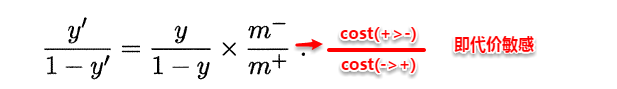

## 第四章 决策树
### 4.1 基本流程
决策树（Decision Tree），它是一种以树形数据结构来展示决策规则和分类结果的模型，作为一种归纳学习算法，其重点是将看似无序、杂乱的已知数据，通过某种技术手段将它们转化成可以预测未知数据的树状模型，每一条从根结点（对最终分类结果贡献最大的属性）到叶子结点（最终分类结果）的路径都代表一条决策的规则。决策树就是形如下图的结构：   
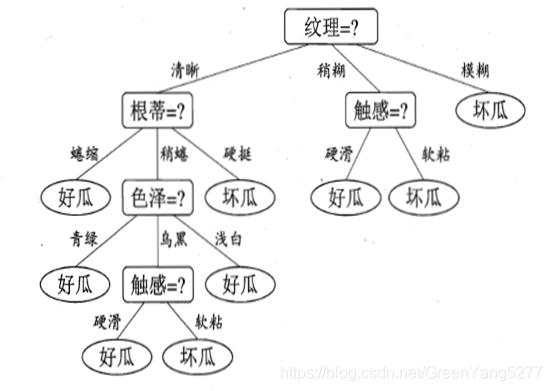   
决策树的目的是为了产生一棵泛化能力强，即处理未见示例能力强的决策树，其基本流程遵循简单且直观的“分而治之”策略。    
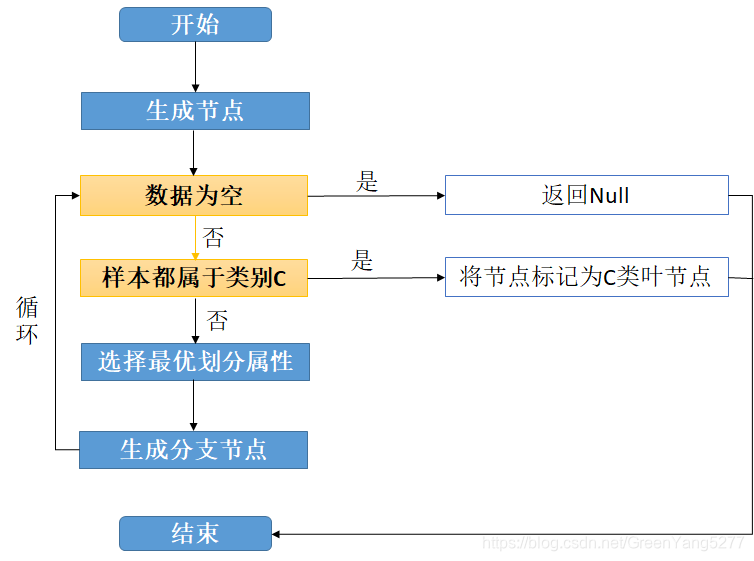    
`基本算法步骤如下：`   
1. 首先从开始位置，将所有数据划分到一个节点，即**根节点**。
2. 然后经历橙色的两个步骤，橙色的表示判断条件：若数据为空集，跳出循环。如果该节点是根节点，返回NULL；如果该节点是中间节点，将该节点标记为**训练数据中类别最多的类别**，若样本都属于同一类，跳出循环，节点标记为该类别；
3. 如果经过橙色标记的判断条件都没有跳出循环，则考虑对该节点进行划分。既然是算法，则不能随意的进行划分，要讲究效率和精度，选择当前条件下的最优属性划分。
4. 经历上步骤划分后，生成新的节点，然后循环判断条件，不断生成新的分支节点，直到所有节点都跳出循环。
5. 结束。这样便会生成一棵决策树。    

`三种导致递归返回的情况:` 
1. 当前结点包含的样本全属于**同一类别**，这时直接将该节点标记为叶节点，并设为相应的类别。
2. 当前**属性集为空**，或是所有样本在所有属性上取值相同，无法划分，这时将该节点标记为叶节点，并将其类别设为**该节点所含样本最多的类别**。
3. 当前结点包含的样本集合为空，不能划分，这时也将该节点标记为叶节点，并将其类别设为**父节点中所含样本最多的类别**。


In [ ]:
import operator
def choose_best_feature(dataset,features):
    pass

def createTree(dataset,features,featLabels):
    # 提取所有样本标签
    classList = [example[-1] for example in dataset]
    # 判断是否所有标签相同
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 判断是否属性集为空(每个数据集只含类别标签)
    if len(dataset[0]) == 1:
        # 返回出现次数最多的类标签
        return majorityCnt(classList)
    # 选择最优属性
    bestFeatIndex = choose_best_feature(dataset,features)
    bestFeatLabel = features[bestFeatIndex]
    featLabels.append(bestFeatLabel)
    # 创建树
    myTree = {bestFeatLabel:{}}
    # 删除该类别标签
    del(features[bestFeatIndex])
    subfeatures = features[:]
    # 提取当前特征的数据
    featValues = [example[bestFeatIndex] for example in dataset]
    # 提取当前特征可能的取值，用于确定分几个枝
    uniqueVals = set(featValues)
    # 递归
    for value in uniqueVals:
        myTree[bestFeatLabel][value] = createTree(splitDataset(dataset,bestFeatIndex,value),subfeatures,featLabels)
    return myTree

# 计算出现次数最多的标签
def majorityCnt(classList):
    # 创建一个字典{类标签:出现次数}
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 降序排序[(类标签,出现次数),(),()]
        sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

# 数据分割，去除当前特征
def splitDataset(dataset,index,value):
    # 创建一个新列表，用于存储分割后的数据
    retDataset = []
    # 遍历数据集，将满足条件的数据添加到新列表
    for featVec in dataset:
        if featVec[index] == value:
            reducedFeatVec = featVec[:index]
            reducedFeatVec.extend(featVec[index+1:])
            retDataset.append(reducedFeatVec)
    return retDataset

### 4.2 划分选择
决策树的关键在于如何选择最优划分属性，我们希望决策树的分支结点所包含的样本尽可能属于同一类别，即**高纯度**。
- `信息增益`：   
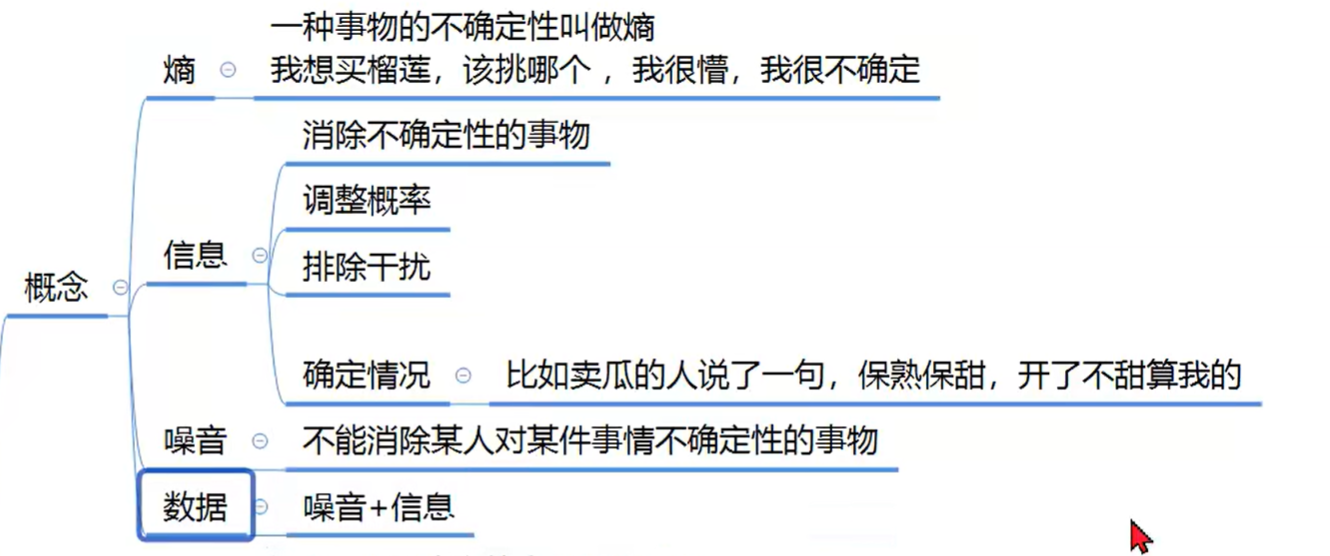    
信息熵是熵的**度量单位**，也就是说，我们规定拿出一枚硬币，随意投出后，他可能是正面也可能是反面，它的信息熵是单位1。就像我们知道一个物体是几千克，是因为我们有一个1kg的砝码作为参考。我们能感受到时间流逝了多少秒，是因为我们规定了秒的单位。  
对于等概率均匀分布：   
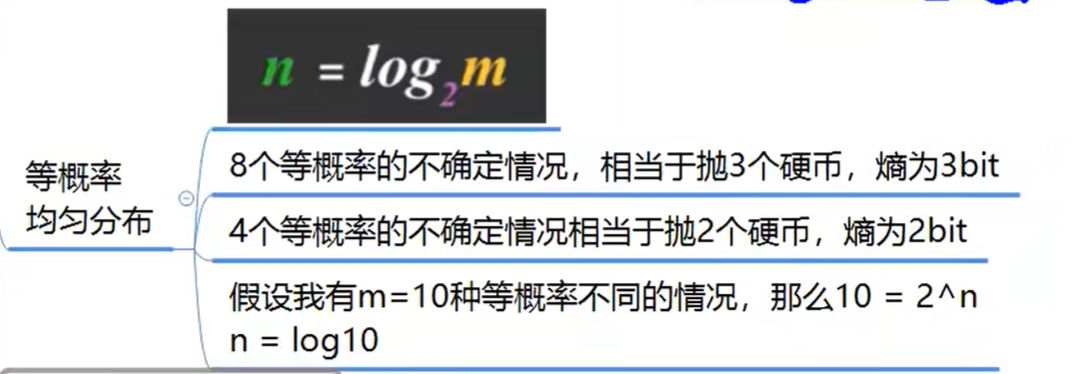     
一般的：    
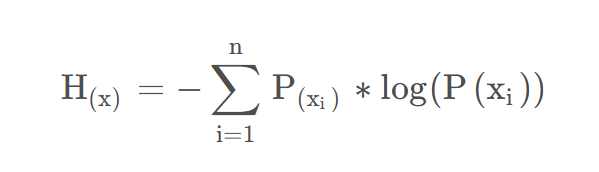   
得知信息前后，**熵的差额**即为信息量，**信息增益**就是熵的减少量。信息增益越大，则说明该属性越有区分度，越能区分样本。    
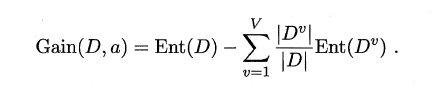   
- `增益率`
ID3算法存在一个问题，就是偏向于取值数目较多的属性，例如：如果存在一个唯一标识，这样样本集D将会被划分为|D|个分支，每个分支只有一个样本，这样划分后的信息熵为零，十分纯净，但是对分类毫无用处。因此C4.5算法使用了“增益率”（gain ratio）来选择划分属性，来避免这个问题带来的困扰。首先使用ID3算法计算出信息增益高于平均水平的候选属性，接着C4.5计算这些候选属性的增益率，增益率定义为：    
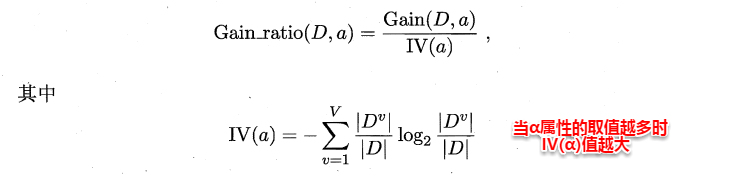    
增益率准则对取值数目较少的属性有所偏好，使用时，先对候选属性进行排序，然后选择增益率最高的属性作为划分属性。   
- `基尼指数`   
基尼指数（Gini Index）表示从数据集中随机抽取两个样本，它们类别标记不一致的概率。对于一个包含K个类别的数据集D，其基尼指数的计算公式为：   
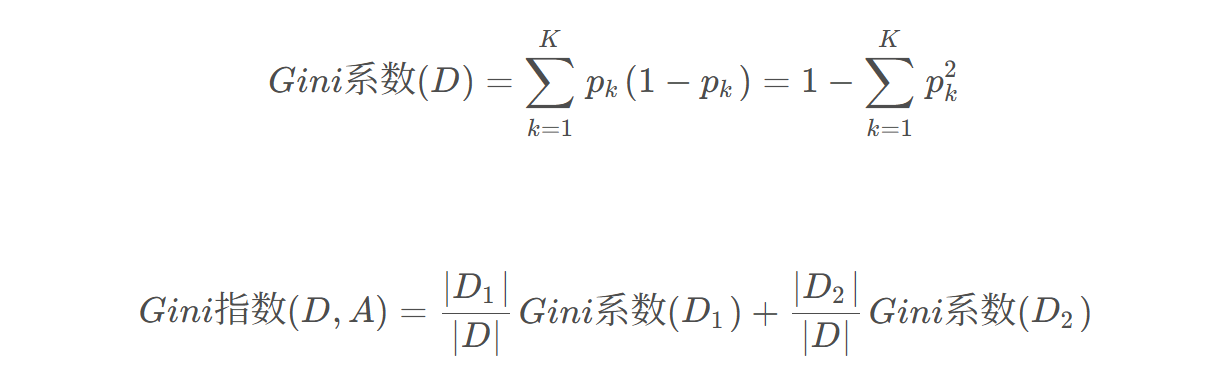    
基尼指数的取值范围在[0, 1]之间，**值越小**表示数据集的**纯度越高**，即属于同一类别的样本占比越大。   
在构建CART分类树时，算法会根据基尼指数来选择最优的特征进行数据集的分割，具体步骤如下：
1. 计算基尼指数：对于每个特征，算法会尝试所有可能的切分点，并计算切分后左右子集的基尼指数。
2. 选择最佳切分：选择使得划分后基尼指数加权和**最小**的那个特征和切分点作为最优划分。加权和是根据子集大小（样本数量）来计算的。
3. 递归构建决策树：递归地构建决策树，直到所有叶结点都包含相同的类别，或者没有更多的特征可以用来划分。   

In [ ]:
import math
############### Entropy ##################
# 计算信息熵
def calulate_Entropy(dataset):
    # 计算样本总数
    num_sample = len(dataset)
    # 创建一个字典{标签值：该标签值出现的次数}
    label_count = {}
    for sample in dataset:
        label = sample[-1]
        if label not in label_count.keys():
            label_count[label] = 0
        label_count[label] += 1
    # 计算信息熵,公式(4.1)
    entropy = 0
    for label in label_count:
        pk = label_count[label] / num_sample
        entropy -= pk * math.log2(pk)
    return entropy

# 通过信息增益计算最优特征
def choose_best_feature(dataset):
    num_sample = len(dataset)
    num_Feature = len(dataset[0]) - 1
    baseInforGain = calulate_Entropy(dataset)
    bestInfoGain = -1
    bestFeature = 0
    # 遍历所有特征
    for i in range(num_Feature):
       # 取当前特征的所有取值
       feature_values = [sample[i]for sample in dataset]
       unique_values = set(feature_values)
       currentEntropy = 0
       # 遍历所有取值
       for value in unique_values:
           # 计算该取值在当前特征下样本的子集
           sub_dataset = splitDataset(dataset, i, value)
           # 计算该取值的权重
           D = len(sub_dataset) / float(len(dataset))
           # 计算该取值的信息熵
           currentEntropy += D * calulate_Entropy(sub_dataset)
       # 计算信息增益
       infoGain = baseInforGain - currentEntropy
       if infoGain > bestInfoGain:
           bestInfoGain = infoGain
           bestFeature = i
    return bestFeature
           


############### Gini index ##################
def Gini_index_single(a,b):
    '''
    @brief: calculate the Gini index of a single sample
    @param a: the number of positive samples
    @param b: the number of negative samples
    @return: the Gini index of a single sample
    '''
    single_gini = 1 - (a/(a+b)**2) - (b/(a+b)**2)
    return round(single_gini,2)

def Gini_index(a,b,c,d):
    '''
    @brief: calculate the Gini index of a dataset    
    @param a: the number of positive samples in the first group
    @param b: the number of negative samples in the first group
    @param c: the number of positive samples in the second group
    @param d: the number of negative samples in the second group
    @return: the Gini index of the dataset
    '''
    gini_index = (Gini_index_single(a,b) * (a+b)/(a+b+c+d)) + (Gini_index_single(c,d) * (c+d)/(a+b+c+d))
    return round(gini_index,2)


### 4.3 剪枝处理
从决策树的构造流程中我们可以直观地看出：不管怎么样的训练集，决策树总是能很好地将各个类别分离开来，这时就会遇到之前提到过的问题：过拟合（overfitting），即太依赖于训练样本。剪枝（pruning）则是决策树算法对付过拟合的主要手段，剪枝的策略有两种：
- `预剪枝（prepruning）`：在构造的过程中先评估，再考虑是否分支。  
对一个节点考虑是否分支时，首先计算决策树不分支时在测试集上的性能，再计算分支之后的性能，若分支对性能没有提升，则选择不分支（即剪枝）。
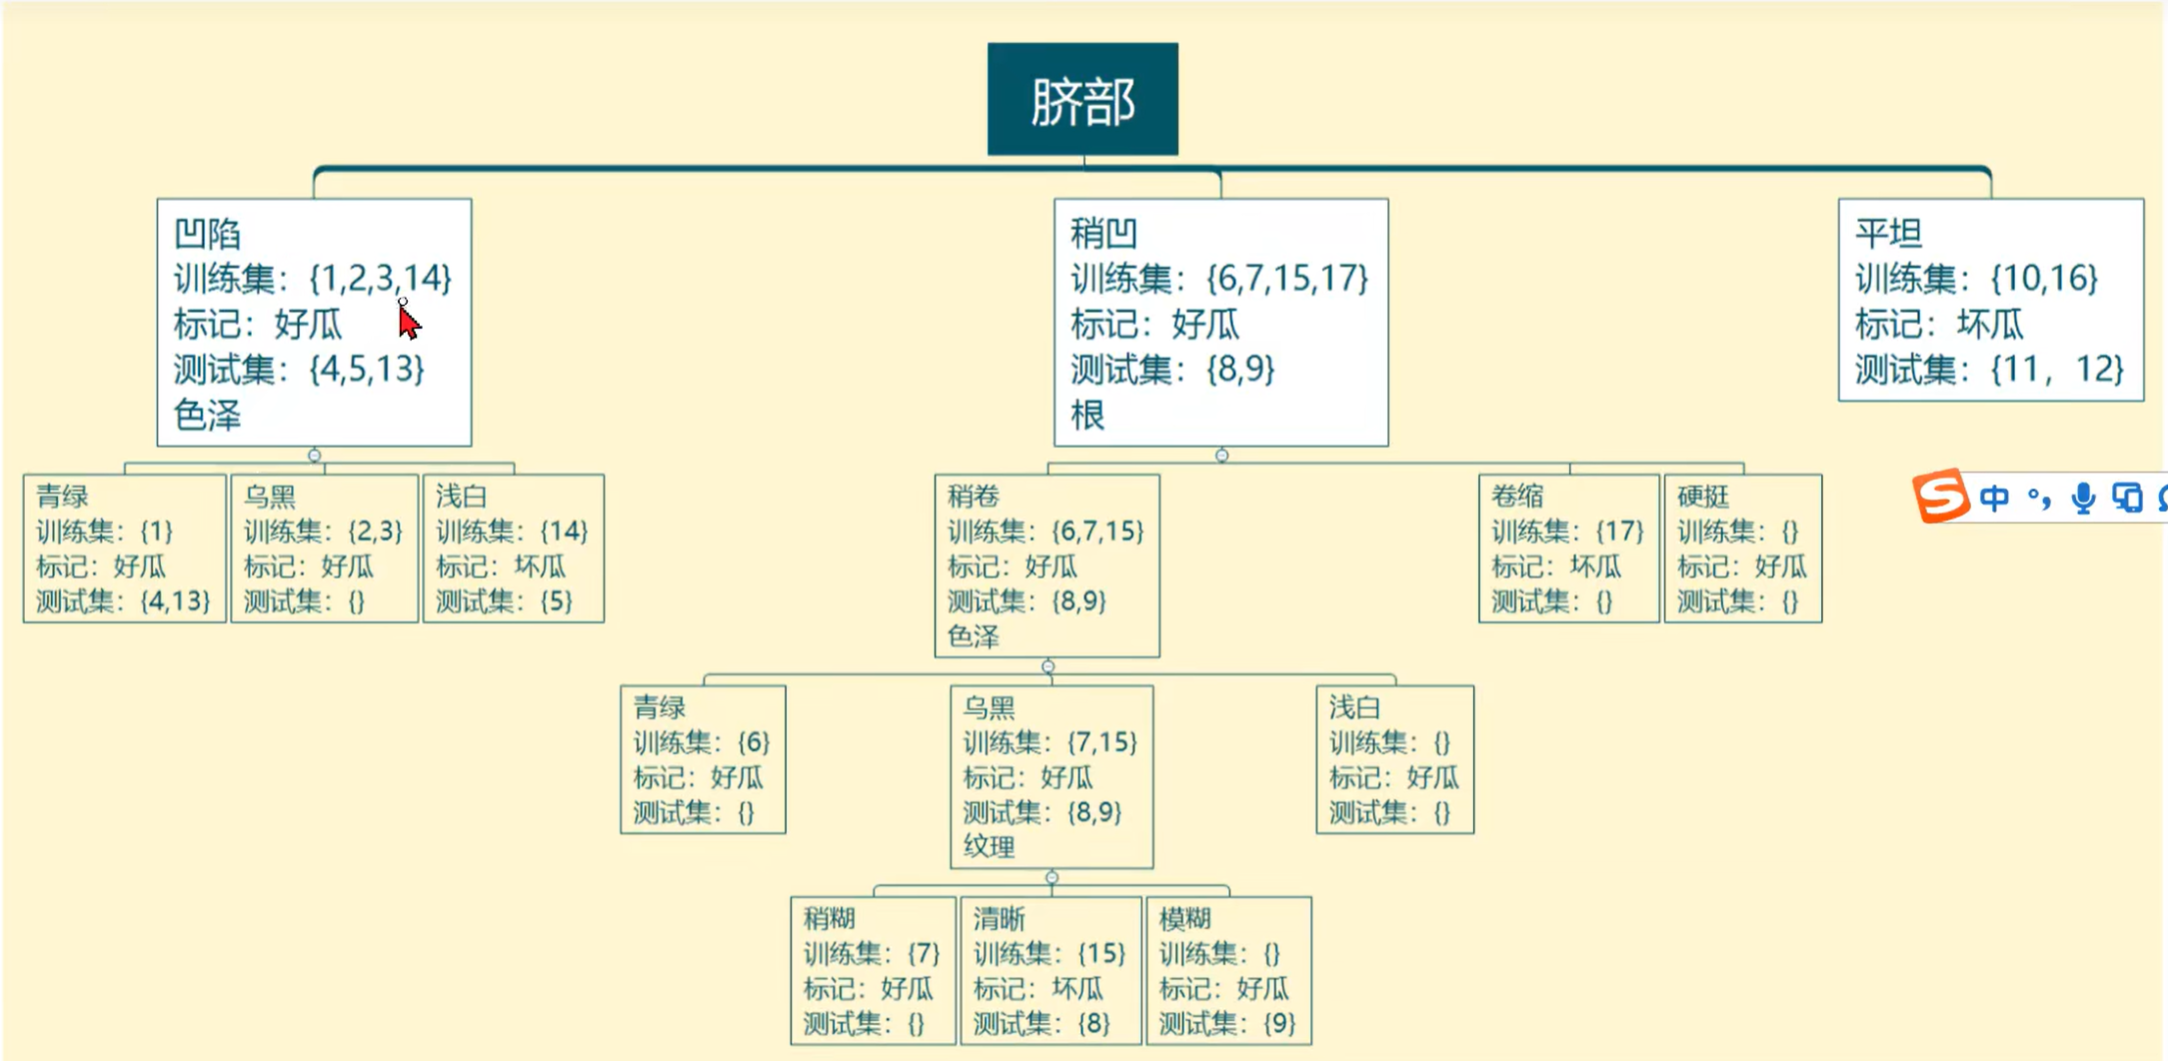    
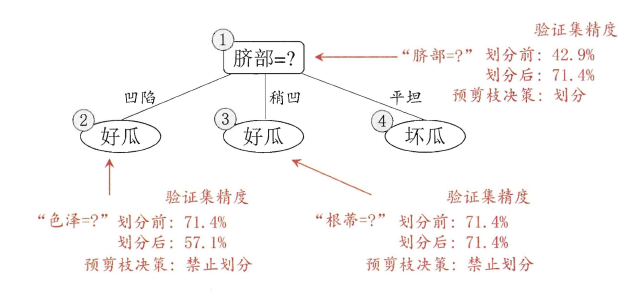   

- `后剪枝（post-pruning）` ：在构造好一颗完整的决策树后，自底向上，评估分支的必要性。  
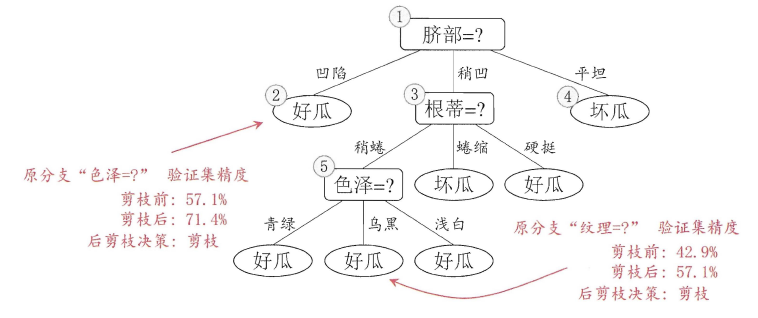   
后剪枝决策树通常比预剪枝决策树保留更多的分支，因此可以获得更好的泛化能力，但由于后剪枝需要先生成完整的决策树，再通过自底向上地对树中的所有非叶节点进行逐一考察，因此其开销较大。


### 4.4 连续与缺失值
- `连续值处理`：对于连续值的属性，若每个取值作为一个分支则显得不可行，因此需要进行离散化处理，常用的方法为二分法，基本思想为：给定样本集D与连续属性α，二分法试图找到一个**划分点t**（也即阈值）将样本集D在属性α上分为≤t与>t两部分。具体步骤如下：  
1. 将α的取值按大小排序，记为α1,α2,…,αn。
2. 设定一个划分点t，使得α1≤t<α2≤…<αn。其中t可取相邻两个值的中点（如t=(α1+α2)/2），也可以为该属性在训练集中出现的不大于中位点的最大值，从而使得最终决策树使用的划分点都在训练集中出现过。
3. 对于每一个取值t，计算信息增益
4. 选择信息增益最大的划分点作为最终的划分点。   
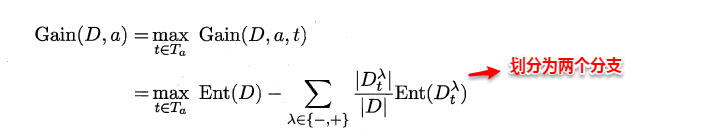    
- `缺失值处理`：现实中常会遇到不完整的样本，即某些属性值缺失。有时若简单采取剔除，则会造成大量的信息浪费，因此在属性值缺失的情况下需要解决两个问题：（1）如何选择划分属性。（2）给定划分属性，若某样本在该属性上缺失值，如何划分到具体的分支上。假定为样本集中的每一个样本都赋予一个权重，根节点中的权重初始化为1，则定义：    
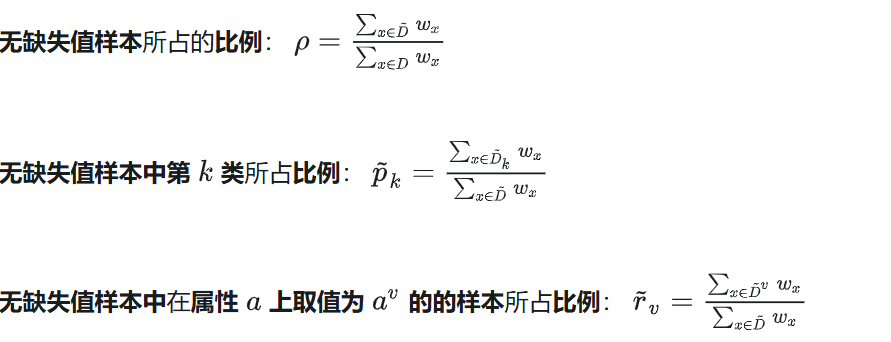    
对于问题（1）：通过在样本集D中选取在属性α上**没有缺失值**的样本子集，计算在该样本子集上的信息增益，最终的信息增益等于该样本子集划分后信息增益乘以**样本子集占样本集的比重**。即：   
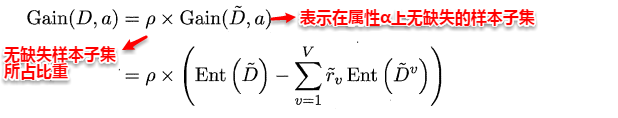   
对于问题（2）：若某样本在属性α上缺失值，则将该样本划分到**所有可能的分支**中，权重为每个分支所含样本比例，即：  
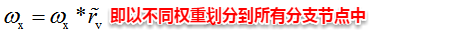   

### 4.5 多变量决策树
每个属性视作坐标空间的一个坐标轴，则d个属性描述的样本就对应d维空间中的一个点。对于分类问题，即找到不同类别样本的分类边界，决策树的分类边界有一个明显的特点就是**轴平行**，即它的分类边界由若干个与坐标轴平行的分段组成。    
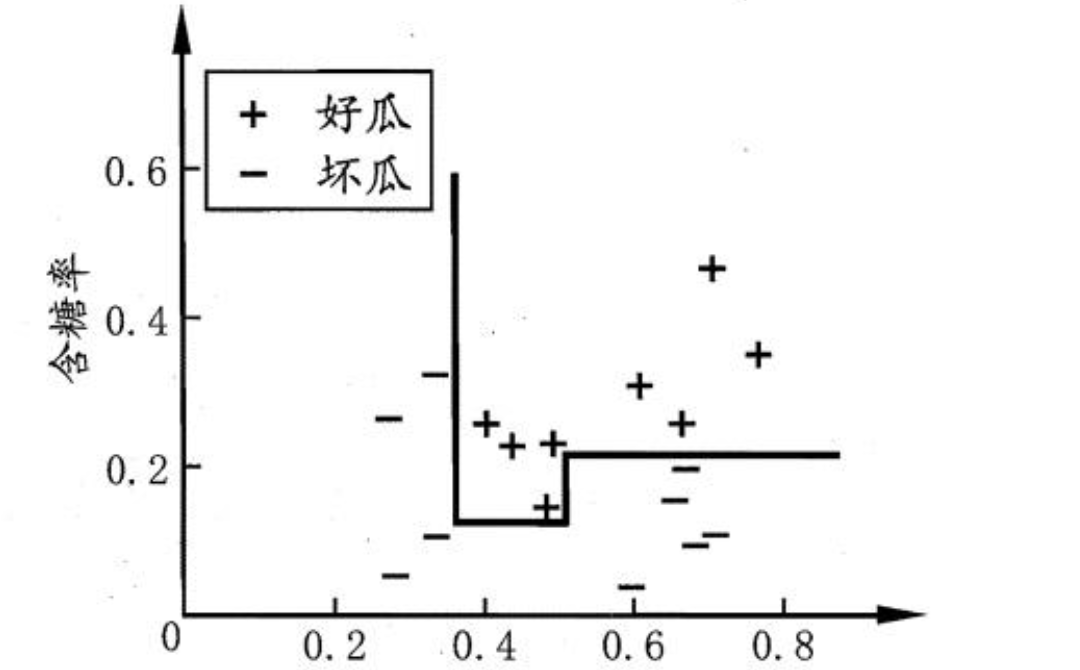    
因为对于任何一个节点，都是以属性的某个取值为标准，进行“是 or 不是”的二分，所以 可以看到分类曲线的每一段均与x轴或y轴其一平行，此时决策树会很复杂，预测时间开销会很大。   
多变量决策树的基本思想是：决策树中的每个节点不再针对某单个属性，而是对多属性的线性组合进行测试，即每个非叶节点是一个线性分类器，例如，每个节点均考虑多个因素，以**多因素的线性组合**为分类标准。   
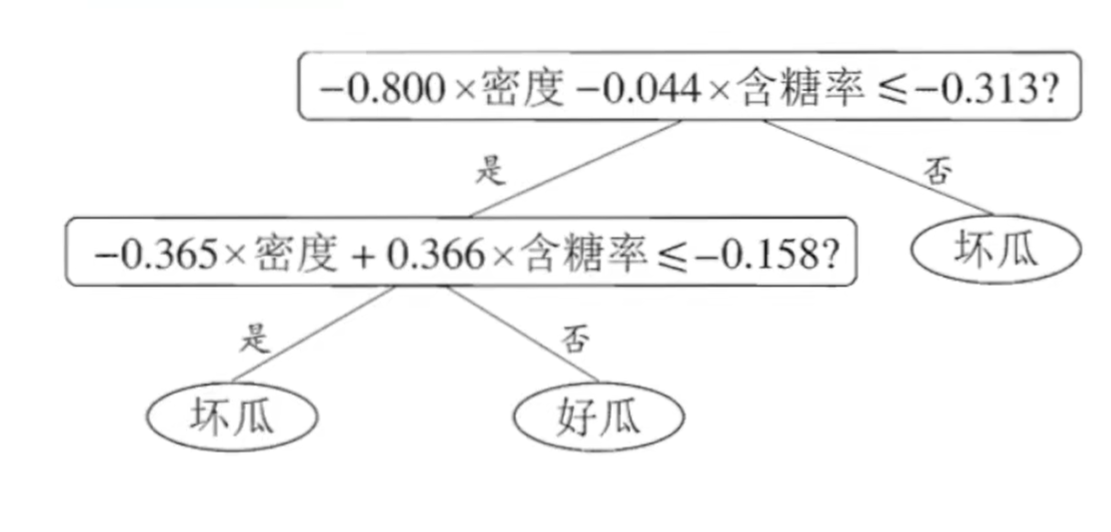    
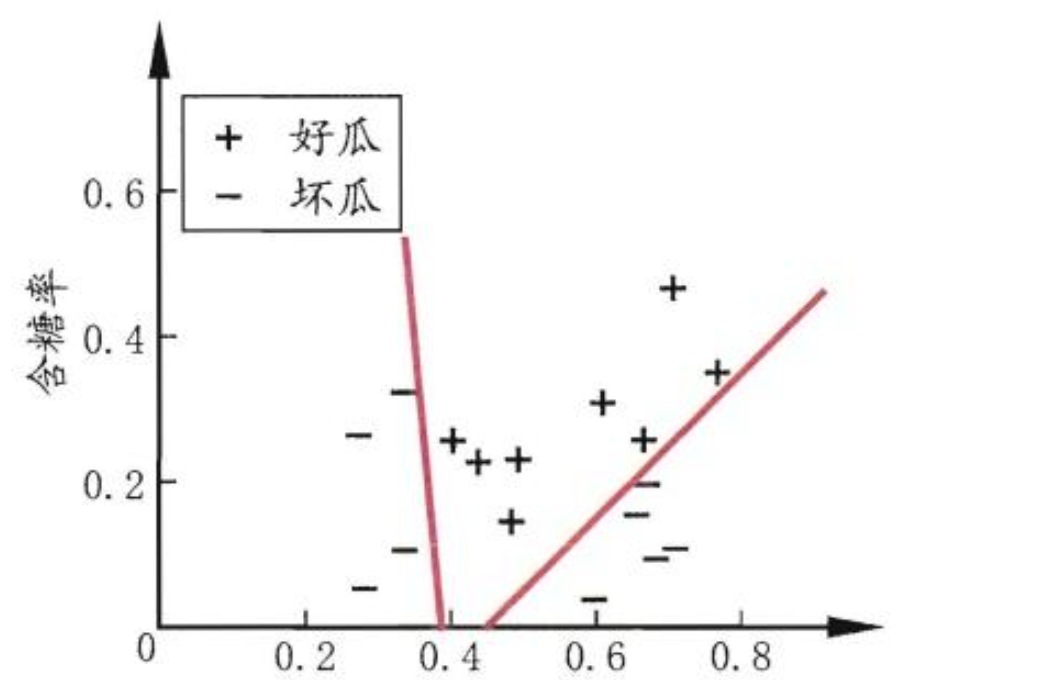   